<a href="https://colab.research.google.com/github/PrashantTripathi6/Business-Case-Target-SQL-Project/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:- Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries**

In [11]:
!gdown --fuzzy https://drive.google.com/file/d/1d-ckc9MmKNWdIoiZK9xmcKXvwa4uvk0b/view?usp=drive_link -O netflix.csv


Downloading...
From: https://drive.google.com/uc?id=1d-ckc9MmKNWdIoiZK9xmcKXvwa4uvk0b
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 26.8MB/s]


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
data = pd.read_csv("netflix.csv")

In [22]:
df = data.copy()

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Exploreing Data**

In [25]:
df.shape

(8807, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [30]:
#list of columns with unique value count
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [31]:
#Checking null in columns
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [36]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [39]:
df['cast'][1]

'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'

**Observations from Data Understanding and Exploration**
**1. General Dataset Overview (df.info()):**


**Dataset Overview (df.info()):**


*   **Rows & Columns:** 8807 rows, 12 columns.
*   **Data Types: ** 11 categorical (object), 1 numerical (release_year).
*  ** Missing Values:**

*   **High: ** director (30% missing), cast, country (~9.4% missing).
*   **Low:** date_added, rating, duration (<0.1% missing).


**Summary Statistics (df.describe()):**


*   **Release Year:**


*   Range: 1925 – 2021.
*   Mean: 2014.18 (most content is recent).
*   Median: 2017 (half released after this).
*   Std Dev: 8.82 (moderate variability).
*   List item


**Key Insights:**


*   Data Quality:
     Significant missing data in director, cast, and country.
     Minimal missing data in date_added, rating, duration.


*   Categorical vs. Numerical:
    Mostly categorical columns (require encoding/grouping).
    release_year shows a broad historical span (1925–2021).
    











**Data Clean**

Agenda 1: First work on date-added column

1.   convert to datetime format
2.   impute missing date values
3.   extract date, month, year column






In [41]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [48]:
# Remove leading and trailing spaces
df['date_added'] = df['date_added'].str.strip()

# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].dt.strftime('%Y-%m-%d')

# Verify the conversion
print(df['date_added'].head())

0    2021-09-25
1    2021-09-24
2    2021-09-24
3    2021-09-24
4    2021-09-24
Name: date_added, dtype: object


In [58]:
mode_date = df['date_added'].mode()[0]
df['date_added'].fillna(mode_date,inplace = True)

In [67]:
df['date_added'] = pd.to_datetime(df['date_added'])


In [71]:
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_day'] = df['date_added'].dt.day
df['years_until_added'] = df['added_year'] - df['release_year']

In [72]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,years_until_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,0


In [74]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,0
release_year,0
rating,4
duration,3


**Impute Missing rating Values**

In [102]:
# Calculate the mode for each type group (Movie/TV Show)
rating_mode_by_type = df.groupby('type')['rating'].apply(lambda x: x.mode().iloc[0])

# Function to impute missing ratings based on type
def impute_rating(row):
    if pd.isnull(row['rating']):
        return rating_mode_by_type[row['type']]
    else:
        return row['rating']

# Apply the function to fill missing values
df['rating'] = df.apply(impute_rating, axis=1)

# Verify that the missing values are imputed
print(df['rating'].isnull().sum())  # Should print 0 if all missing values are filled

0


**handling duration column**


*   splitting it into movie_duration and tvShowSeasons
*   imputing missing values




In [103]:
# Step 1: Create movie_duration and num_seasons columns based on 'duration' column
df['movie_duration'] = df.apply(
    lambda x: int(x['duration'].split()[0]) if isinstance(x['duration'], str) and 'min' in x['duration'].lower() else None, axis=1)

df['num_seasons'] = df.apply(
    lambda x: int(x['duration'].split()[0]) if isinstance(x['duration'], str) and ('season' in x['duration'].lower() or 'seasons' in x['duration'].lower()) else None, axis=1)

# Step 2: Verify the result
print(df[['type', 'duration', 'movie_duration', 'num_seasons']].head())

      type   duration  movie_duration  num_seasons
0    Movie     90 min            90.0          NaN
1  TV Show  2 Seasons             NaN          2.0
2  TV Show   1 Season             NaN          1.0
3  TV Show   1 Season             NaN          1.0
4  TV Show  2 Seasons             NaN          2.0


In [104]:
# Display rows where 'duration' is NaN
nan_duration_df = df[df['duration'].isna()]

# Show the result
print(nan_duration_df)

     show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added  release_year rating duration  \
5541  Louis C.K.  United States 2017-04-04          2017  TV-MA      NaN   
5794  Louis C.K.  United States 2016-09-16          2010  TV-MA      NaN   
5813  Louis C.K.  United States 2016-08-15          2015  TV-MA      NaN   

     listed_in                                        description  added_year  \
5541    Movies  Louis C.K. muses on religion, eternal love, gi...        2017   
5794    Movies  Emmy-winning comedy writer Louis C.K. brings h...        2016   
5813    Movies  The comic puts his trademark hilarious/thought...        2016   

      added_month  added_day  years_until_added  movie_duration  num_seasons 

From above we can conclude that we only need to apply imputation of missing values in movie_duration column

In [105]:
# Step 1: Create a temporary dataframe to test the logic
temp_df = df.copy()

# Step 2: Calculate the mode of the 'movie_duration' column
movie_duration_mode = temp_df['movie_duration'].mode()[0]  # Get the mode of the 'movie_duration' column

# Step 3: Fill NaN values in 'movie_duration' where 'duration' is NaN with the mode
temp_df.loc[temp_df['duration'].isna(), 'movie_duration'] = movie_duration_mode

# Step 4: Verify the results
print("Rows with NaN in 'movie_duration' (before imputation):")
print(df[df['movie_duration'].isna()][['type', 'duration', 'movie_duration']].head())

print("\nRows after imputation (checking for 'movie_duration' NaNs):")
print(temp_df[temp_df['movie_duration'].isna()][['type', 'duration', 'movie_duration']].head())


Rows with NaN in 'movie_duration' (before imputation):
      type   duration  movie_duration
1  TV Show  2 Seasons             NaN
2  TV Show   1 Season             NaN
3  TV Show   1 Season             NaN
4  TV Show  2 Seasons             NaN
5  TV Show   1 Season             NaN

Rows after imputation (checking for 'movie_duration' NaNs):
      type   duration  movie_duration
1  TV Show  2 Seasons             NaN
2  TV Show   1 Season             NaN
3  TV Show   1 Season             NaN
4  TV Show  2 Seasons             NaN
5  TV Show   1 Season             NaN


In [106]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           6173 non-null   object        
 4   cast               7982 non-null   object        
 5   country            7976 non-null   object        
 6   date_added         8807 non-null   datetime64[ns]
 7   release_year       8807 non-null   int64         
 8   rating             8807 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  added_year         8807 non-null   int32         
 13  added_month        8807 non-null   int32         
 14  added_da

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           6173 non-null   object        
 4   cast               7982 non-null   object        
 5   country            7976 non-null   object        
 6   date_added         8807 non-null   datetime64[ns]
 7   release_year       8807 non-null   int64         
 8   rating             8807 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  added_year         8807 non-null   int32         
 13  added_month        8807 non-null   int32         
 14  added_da

In [108]:
# Calculate the mode of the 'movie_duration' column
movie_duration_mode = df['movie_duration'].mode()[0]  # Get the mode of the 'movie_duration' column

# Fill NaN values in 'movie_duration' where 'duration' is NaN with the mode
df.loc[df['duration'].isna(), 'movie_duration'] = movie_duration_mode

# Verify the result
print("Rows with NaN in 'movie_duration' (before imputation):")
print(df[df['movie_duration'].isna()][['type', 'duration', 'movie_duration']].head())

print("\nRows after imputation (checking for 'movie_duration' NaNs):")
print(df[df['movie_duration'].isna()][['type', 'duration', 'movie_duration']].head())

Rows with NaN in 'movie_duration' (before imputation):
      type   duration  movie_duration
1  TV Show  2 Seasons             NaN
2  TV Show   1 Season             NaN
3  TV Show   1 Season             NaN
4  TV Show  2 Seasons             NaN
5  TV Show   1 Season             NaN

Rows after imputation (checking for 'movie_duration' NaNs):
      type   duration  movie_duration
1  TV Show  2 Seasons             NaN
2  TV Show   1 Season             NaN
3  TV Show   1 Season             NaN
4  TV Show  2 Seasons             NaN
5  TV Show   1 Season             NaN


In [109]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,years_until_added,movie_duration,num_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,TV-MA,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,1,90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,0,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,0,NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,0,NaN,2.0


**count number of countries, cast and genres for respective columns before exploding**

In [110]:
# Handle missing values (replace NaN with empty string for safe splitting)
temp_df['country'] = temp_df['country'].fillna('')
temp_df['cast'] = temp_df['cast'].fillna('')
temp_df['listed_in'] = temp_df['listed_in'].fillna('')

# Create new columns: num_of_countries, num_of_cast, and num_genres
temp_df['num_of_countries'] = temp_df['country'].apply(lambda x: len(x.split(', ')) if x else 0)
temp_df['num_of_cast'] = temp_df['cast'].apply(lambda x: len(x.split(', ')) if x else 0)
temp_df['num_genres'] = temp_df['listed_in'].apply(lambda x: len(x.split(', ')) if x else 0)

# Verify the new columns are created properly
print(temp_df[['country', 'num_of_countries', 'cast', 'num_of_cast', 'listed_in', 'num_genres']].head())

         country  num_of_countries  \
0  United States                 1   
1   South Africa                 1   
2                                0   
3                                0   
4          India                 1   

                                                cast  num_of_cast  \
0                                                               0   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...           19   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            9   
3                                                               0   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...            8   

                                           listed_in  num_genres  
0                                      Documentaries           1  
1    International TV Shows, TV Dramas, TV Mysteries           3  
2  Crime TV Shows, International TV Shows, TV Act...           3  
3                             Docuseries, Reality TV           2  
4  International TV S

In [111]:
# Fill missing values in the relevant columns for main df
df['country'] = df['country'].fillna('')
df['cast'] = df['cast'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')

# Create new columns: num_of_countries, num_of_cast, and num_genres
df['num_of_countries'] = df['country'].apply(lambda x: len(x.split(', ')) if x else 0)
df['num_of_cast'] = df['cast'].apply(lambda x: len(x.split(', ')) if x else 0)
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(', ')) if x else 0)

# Verify the new columns are created properly
print(df[['country', 'num_of_countries', 'cast', 'num_of_cast', 'listed_in', 'num_genres']].head())

         country  num_of_countries  \
0  United States                 1   
1   South Africa                 1   
2                                0   
3                                0   
4          India                 1   

                                                cast  num_of_cast  \
0                                                               0   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...           19   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            9   
3                                                               0   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...            8   

                                           listed_in  num_genres  
0                                      Documentaries           1  
1    International TV Shows, TV Dramas, TV Mysteries           3  
2  Crime TV Shows, International TV Shows, TV Act...           3  
3                             Docuseries, Reality TV           2  
4  International TV S

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           6173 non-null   object        
 4   cast               8807 non-null   object        
 5   country            8807 non-null   object        
 6   date_added         8807 non-null   datetime64[ns]
 7   release_year       8807 non-null   int64         
 8   rating             8807 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  added_year         8807 non-null   int32         
 13  added_month        8807 non-null   int32         
 14  added_da

In [113]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,years_until_added,movie_duration,num_seasons,num_of_countries,num_of_cast,num_genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,TV-MA,90 min,...,"As her father nears the end of his life, filmm...",2021,9,25,1,90.0,NaN,1,0,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,...,To protect his family from a powerful drug lor...,2021,9,24,0,NaN,1.0,0,9,3
3,s4,TV Show,Jailbirds New Orleans,NaN,,,2021-09-24,2021,TV-MA,1 Season,...,"Feuds, flirtations and toilet talk go down amo...",2021,9,24,0,NaN,1.0,0,0,2
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,In a city of coaching centers known to train I...,2021,9,24,0,NaN,2.0,1,8,3


**Impute director column while grouping it by country and type**

In [114]:
# Check rows where 'director' is NaN
print(temp_df[temp_df['director'].isna()][['country', 'type', 'director']])

# Group by country and type, and impute missing values with the mode if available
def impute_director(group):
    # Get the mode of the director column for the group
    mode_value = group['director'].mode()
    if not mode_value.empty:
        # If mode is available, fill NaN with the mode
        group['director'] = group['director'].fillna(mode_value[0])
    else:
        # If no mode available, leave the NaN as is or fill with placeholder (if needed)
        group['director'] = group['director'].fillna('Unknown')  # Placeholder for missing data
    return group

# Apply the function to fill missing values
temp_df = temp_df.groupby(['country', 'type'], group_keys=False).apply(impute_director)

# Verify if the NaN values in the 'director' column are filled now
print(temp_df[temp_df['director'].isna()][['country', 'type', 'director']])

                                            country     type director
1                                      South Africa  TV Show      NaN
3                                                    TV Show      NaN
4                                             India  TV Show      NaN
10                                                   TV Show      NaN
14                                                   TV Show      NaN
...                                             ...      ...      ...
8795                                  Japan, Canada  TV Show      NaN
8796                                         Turkey  TV Show      NaN
8797  United States, France, South Korea, Indonesia  TV Show      NaN
8800                                       Pakistan  TV Show      NaN
8803                                                 TV Show      NaN

[2634 rows x 3 columns]
Empty DataFrame
Columns: [country, type, director]
Index: []


<ipython-input-114-415400434ab5>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_df = temp_df.groupby(['country', 'type'], group_keys=False).apply(impute_director)


In [115]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           8807 non-null   object        
 4   cast               8807 non-null   object        
 5   country            8807 non-null   object        
 6   date_added         8807 non-null   datetime64[ns]
 7   release_year       8807 non-null   int64         
 8   rating             8807 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  added_year         8807 non-null   int32         
 13  added_month        8807 non-null   int32         
 14  added_day    

In [116]:
# Check rows where 'director' is NaN in the main df
print(df[df['director'].isna()][['country', 'type', 'director']])

# Define the function to impute missing director values by grouping by country and type
def impute_director(group):
    # Get the mode of the director column for the group
    mode_value = group['director'].mode()
    if not mode_value.empty:
        # If mode is available, fill NaN with the mode
        group['director'] = group['director'].fillna(mode_value[0])
    else:
        # If no mode available, fill NaN with a placeholder 'Unknown'
        group['director'] = group['director'].fillna('Unknown')  # Placeholder for missing data
    return group

# Apply the imputation function to the entire DataFrame (grouped by 'country' and 'type')
df = df.groupby(['country', 'type'], group_keys=False).apply(impute_director)

# Verify if the NaN values in the 'director' column are filled now
print(df[df['director'].isna()][['country', 'type', 'director']])

                                            country     type director
1                                      South Africa  TV Show      NaN
3                                                    TV Show      NaN
4                                             India  TV Show      NaN
10                                                   TV Show      NaN
14                                                   TV Show      NaN
...                                             ...      ...      ...
8795                                  Japan, Canada  TV Show      NaN
8796                                         Turkey  TV Show      NaN
8797  United States, France, South Korea, Indonesia  TV Show      NaN
8800                                       Pakistan  TV Show      NaN
8803                                                 TV Show      NaN

[2634 rows x 3 columns]
Empty DataFrame
Columns: [country, type, director]
Index: []


<ipython-input-116-1650229b2652>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['country', 'type'], group_keys=False).apply(impute_director)


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           8807 non-null   object        
 4   cast               8807 non-null   object        
 5   country            8807 non-null   object        
 6   date_added         8807 non-null   datetime64[ns]
 7   release_year       8807 non-null   int64         
 8   rating             8807 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  added_year         8807 non-null   int32         
 13  added_month        8807 non-null   int32         
 14  added_day    

In [118]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,years_until_added,movie_duration,num_seasons,num_of_countries,num_of_cast,num_genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,TV-MA,90 min,...,"As her father nears the end of his life, filmm...",2021,9,25,1,90.0,NaN,1,0,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,...,To protect his family from a powerful drug lor...,2021,9,24,0,NaN,1.0,0,9,3
3,s4,TV Show,Jailbirds New Orleans,Bhavik Thakore,,,2021-09-24,2021,TV-MA,1 Season,...,"Feuds, flirtations and toilet talk go down amo...",2021,9,24,0,NaN,1.0,0,0,2
4,s5,TV Show,Kota Factory,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,In a city of coaching centers known to train I...,2021,9,24,0,NaN,2.0,1,8,3


In [119]:
# Exploding 'country', 'cast', and 'listed_in' columns into individual rows
temp_df = df.copy()

# Exploding the 'country' column
temp_df['country'] = temp_df['country'].str.split(', ')  # Split the country values
temp_df = temp_df.explode('country')  # Exploding the country column into separate rows

# Exploding the 'cast' column
temp_df['cast'] = temp_df['cast'].str.split(', ')  # Split the cast values
temp_df = temp_df.explode('cast')  # Exploding the cast column into separate rows

# Exploding the 'listed_in' column
temp_df['listed_in'] = temp_df['listed_in'].str.split(', ')  # Split the genres
temp_df = temp_df.explode('listed_in')  # Exploding the listed_in column into separate rows

# Check the result of the exploded columns
print(temp_df[['country', 'cast', 'listed_in']].head())

         country         cast               listed_in
0  United States                        Documentaries
1   South Africa   Ama Qamata  International TV Shows
1   South Africa   Ama Qamata               TV Dramas
1   South Africa   Ama Qamata            TV Mysteries
1   South Africa  Khosi Ngema  International TV Shows


In [120]:
# Creating a copy of the main df to avoid altering original data
df_copy = df.copy()

# Exploding the 'country' column
df_copy['country'] = df_copy['country'].str.split(', ')  # Split the country values
df_copy = df_copy.explode('country')  # Exploding the country column into separate rows

# Exploding the 'cast' column
df_copy['cast'] = df_copy['cast'].str.split(', ')  # Split the cast values
df_copy = df_copy.explode('cast')  # Exploding the cast column into separate rows

# Exploding the 'listed_in' column
df_copy['listed_in'] = df_copy['listed_in'].str.split(', ')  # Split the genres
df_copy = df_copy.explode('listed_in')  # Exploding the listed_in column into separate rows

# Check the result of the exploded columns
print(df_copy[['country', 'cast', 'listed_in']].head())

         country         cast               listed_in
0  United States                        Documentaries
1   South Africa   Ama Qamata  International TV Shows
1   South Africa   Ama Qamata               TV Dramas
1   South Africa   Ama Qamata            TV Mysteries
1   South Africa  Khosi Ngema  International TV Shows


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           8807 non-null   object        
 4   cast               8807 non-null   object        
 5   country            8807 non-null   object        
 6   date_added         8807 non-null   datetime64[ns]
 7   release_year       8807 non-null   int64         
 8   rating             8807 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  added_year         8807 non-null   int32         
 13  added_month        8807 non-null   int32         
 14  added_day    

In [122]:
# Function to impute blank values (empty strings) using mode, grouped by 'country' and 'type'
def impute_blank_values(group, column_name):
    # Check if there are empty strings in the column
    if (group[column_name] == '').sum() > 0:  # Only impute if there are blank values
        # Get the mode of the specified column for the group
        mode_value = group[column_name].mode()
        if not mode_value.empty:
            # If mode is available, fill empty strings with the mode
            group[column_name] = group[column_name].replace('', mode_value[0])
        else:
            # If no mode is available, fill empty strings with a placeholder (e.g., 'Unknown')
            group[column_name] = group[column_name].replace('', 'Unknown')  # Placeholder for missing data
    return group

# Apply imputation on 'country', 'cast', and 'listed_in' columns grouped by 'country' and 'type'
temp_df = temp_df.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_blank_values(group, 'country'))
temp_df = temp_df.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_blank_values(group, 'cast'))
temp_df = temp_df.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_blank_values(group, 'listed_in'))

# Check the result to ensure empty strings are replaced (if any)
print(temp_df[['country', 'cast', 'listed_in']].head(20))


<ipython-input-122-08f5ea9301ab>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_df = temp_df.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_blank_values(group, 'country'))
<ipython-input-122-08f5ea9301ab>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_df = temp_df.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_blank_values(group, 'cast'))

         country              cast               listed_in
0  United States                             Documentaries
1   South Africa        Ama Qamata  International TV Shows
1   South Africa        Ama Qamata               TV Dramas
1   South Africa        Ama Qamata            TV Mysteries
1   South Africa       Khosi Ngema  International TV Shows
1   South Africa       Khosi Ngema               TV Dramas
1   South Africa       Khosi Ngema            TV Mysteries
1   South Africa     Gail Mabalane  International TV Shows
1   South Africa     Gail Mabalane               TV Dramas
1   South Africa     Gail Mabalane            TV Mysteries
1   South Africa    Thabang Molaba  International TV Shows
1   South Africa    Thabang Molaba               TV Dramas
1   South Africa    Thabang Molaba            TV Mysteries
1   South Africa  Dillon Windvogel  International TV Shows
1   South Africa  Dillon Windvogel               TV Dramas
1   South Africa  Dillon Windvogel            TV Mysteri

<ipython-input-122-08f5ea9301ab>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_df = temp_df.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_blank_values(group, 'listed_in'))


In [123]:
print(temp_df[['country', 'cast', 'listed_in']].head(20))

         country              cast               listed_in
0  United States                             Documentaries
1   South Africa        Ama Qamata  International TV Shows
1   South Africa        Ama Qamata               TV Dramas
1   South Africa        Ama Qamata            TV Mysteries
1   South Africa       Khosi Ngema  International TV Shows
1   South Africa       Khosi Ngema               TV Dramas
1   South Africa       Khosi Ngema            TV Mysteries
1   South Africa     Gail Mabalane  International TV Shows
1   South Africa     Gail Mabalane               TV Dramas
1   South Africa     Gail Mabalane            TV Mysteries
1   South Africa    Thabang Molaba  International TV Shows
1   South Africa    Thabang Molaba               TV Dramas
1   South Africa    Thabang Molaba            TV Mysteries
1   South Africa  Dillon Windvogel  International TV Shows
1   South Africa  Dillon Windvogel               TV Dramas
1   South Africa  Dillon Windvogel            TV Mysteri

In [126]:
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,years_until_added,movie_duration,num_seasons,num_of_countries,num_of_cast,num_genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,<NA>,United States,2021-09-25,2020,TV-MA,90 min,...,"As her father nears the end of his life, filmm...",2021,9,25,1,90.0,NaN,1,0,1
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
1,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3


In [129]:
# Replace blank values ('') with NaN in the relevant columns
df_copy['country'] = df_copy['country'].replace('', pd.NA)
df_copy['cast'] = df_copy['cast'].replace('', pd.NA)
df_copy['listed_in'] = df_copy['listed_in'].replace('', pd.NA)

# Now, you can apply imputation for 'country', 'cast', and 'listed_in' as before
df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'country'))
df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'cast'))
df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'listed_in'))

# Check the result to ensure NaN values are filled
print(df_copy[['country', 'cast', 'listed_in']].head())

<ipython-input-129-ac3ac5800ec1>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'country'))
<ipython-input-129-ac3ac5800ec1>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'cast'))


         country               cast               listed_in
0  United States  Samuel L. Jackson           Documentaries
1   South Africa         Ama Qamata  International TV Shows
1   South Africa         Ama Qamata               TV Dramas
1   South Africa         Ama Qamata            TV Mysteries
1   South Africa        Khosi Ngema  International TV Shows


<ipython-input-129-ac3ac5800ec1>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'listed_in'))


In [128]:
# Define the imputation function using mode
def impute_column_mode(group, column_name):
    # Get the mode of the specified column for the group
    mode_value = group[column_name].mode()
    if not mode_value.empty:
        # If mode is available, fill NaN with the mode
        group[column_name] = group[column_name].fillna(mode_value[0])
    else:
        # If no mode is available, fill NaN with a placeholder (e.g., 'Unknown')
        group[column_name] = group[column_name].fillna('Unknown')  # Placeholder for missing data
    return group

# Now, you can apply imputation for 'country', 'cast', and 'listed_in' as before
df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'country'))
df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'cast'))
df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'listed_in'))

# Check the result to ensure NaN values are filled
print(df_copy[['country', 'cast', 'listed_in']].head())

<ipython-input-128-e8dd5b974ef1>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'country'))
<ipython-input-128-e8dd5b974ef1>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'cast'))


         country               cast               listed_in
0  United States  Samuel L. Jackson           Documentaries
1   South Africa         Ama Qamata  International TV Shows
1   South Africa         Ama Qamata               TV Dramas
1   South Africa         Ama Qamata            TV Mysteries
1   South Africa        Khosi Ngema  International TV Shows


<ipython-input-128-e8dd5b974ef1>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_copy = df_copy.groupby(['country', 'type'], group_keys=False).apply(lambda group: impute_column_mode(group, 'listed_in'))


In [130]:
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,years_until_added,movie_duration,num_seasons,num_of_countries,num_of_cast,num_genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel L. Jackson,United States,2021-09-25,2020,TV-MA,90 min,...,"As her father nears the end of his life, filmm...",2021,9,25,1,90.0,NaN,1,0,1
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
1,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3


**Data is clean now, we can beging analysis now**

In [131]:
df_copy.shape

(175148, 21)

In [132]:
df_copy.to_csv('cleaned_netflix_data.csv', index=False)

In [134]:
from google.colab import drive
drive.mount('/content/drive')
df_copy.to_csv('/content/drive/MyDrive/Datasets/Pandas/cleaned_netflix_data.csv', index=False)

Mounted at /content/drive


In [137]:
!gdown --fuzzy https://drive.google.com/file/d/1Wf6-GIMLfCO_CUuydJejh_cwYbSWIUsE/view?usp=drive_link -O netflix_cleaned_data

Downloading...
From: https://drive.google.com/uc?id=1Wf6-GIMLfCO_CUuydJejh_cwYbSWIUsE
To: /content/netflix_cleaned_data
100% 50.1M/50.1M [00:00<00:00, 156MB/s]


In [139]:
df_clean = pd.read_csv('netflix_cleaned_data')
df_clean.shape

(175148, 21)

In [140]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175148 entries, 0 to 175147
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   show_id            175148 non-null  object 
 1   type               175148 non-null  object 
 2   title              175148 non-null  object 
 3   director           175148 non-null  object 
 4   cast               175148 non-null  object 
 5   country            175148 non-null  object 
 6   date_added         175148 non-null  object 
 7   release_year       175148 non-null  int64  
 8   rating             175148 non-null  object 
 9   duration           175145 non-null  object 
 10  listed_in          175148 non-null  object 
 11  description        175148 non-null  object 
 12  added_year         175148 non-null  int64  
 13  added_month        175148 non-null  int64  
 14  added_day          175148 non-null  int64  
 15  years_until_added  175148 non-null  int64  
 16  mo

In [141]:
df_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,years_until_added,movie_duration,num_seasons,num_of_countries,num_of_cast,num_genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel L. Jackson,United States,2021-09-25,2020,TV-MA,90 min,...,"As her father nears the end of his life, filmm...",2021,9,25,1,90.0,NaN,1,0,1
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,24,0,NaN,2.0,1,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175143,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-MA,111 min,...,A scrappy but poor boy worms his way into a ty...,2019,3,2,4,111.0,NaN,1,8,3
175144,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-MA,111 min,...,A scrappy but poor boy worms his way into a ty...,2019,3,2,4,111.0,NaN,1,8,3
175145,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-MA,111 min,...,A scrappy but poor boy worms his way into a ty...,2019,3,2,4,111.0,NaN,1,8,3
175146,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-MA,111 min,...,A scrappy but poor boy worms his way into a ty...,2019,3,2,4,111.0,NaN,1,8,3


In [142]:
# Observing the shape of the dataset
print("Shape of dataset:", data.shape)

# Display data types and non-null counts
print("\nData types and non-null counts:\n")
print(data.info())

# Checking for missing values
print("\nMissing values in each column:\n")
print(data.isnull().sum())

# Statistical summaries
print("\nStatistical summary for numerical columns:\n")
print(data.describe())

print("\nStatistical summary for object columns:\n")
print(df.describe(include='object'))

Shape of dataset: (8807, 12)

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing values in each column:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
rele

In [143]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**Non-Graphical Analysis: Value Counts and Unique Attributes**

In [144]:
# Value counts for categorical columns in the original dataset (before explosion)
print("\nValue counts for 'type' (original dataset):\n")
print(data['type'].value_counts())

print("\nValue counts for 'rating' (original dataset):\n")
print(data['rating'].value_counts())

# Count unique values in 'country' for the original dataset (unique titles)
print("\nUnique values in 'country' (original dataset):\n")
print(data['country'].nunique())
print("\nTop 5 countries (unique titles) in the original dataset:\n")
print(data.groupby('country').size().sort_values(ascending=False).head())

# Count unique values in 'listed_in' (genres) for the original dataset
print("\nUnique values in 'listed_in' (genres, original dataset):\n")
print(data['listed_in'].nunique())
print("\nTop 5 genres (unique titles) in the original dataset:\n")
print(data.groupby('listed_in').size().sort_values(ascending=False).head())

# For the cleaned dataset (after exploding the columns)
# Now let's work with the cleaned data to get accurate counts based on unique titles

# Remove duplicates based on 'show_id' to count unique titles
unique_titles_cleaned = df_clean.drop_duplicates(subset=['show_id'])

# Value counts for 'type' in the cleaned dataset (after explosion)
print("\nValue counts for 'type' (cleaned dataset, unique titles):\n")
print(unique_titles_cleaned['type'].value_counts())

print("\nValue counts for 'rating' (cleaned dataset, unique titles):\n")
print(unique_titles_cleaned['rating'].value_counts())

# Count unique values in 'country' for the cleaned dataset (unique titles)
print("\nUnique values in 'country' (cleaned dataset, unique titles):\n")
print(unique_titles_cleaned['country'].nunique())
print("\nTop 5 countries (unique titles) in the cleaned dataset:\n")
print(unique_titles_cleaned.groupby('country').size().sort_values(ascending=False).head())

# Count unique values in 'listed_in' (genres) for the cleaned dataset
print("\nUnique values in 'listed_in' (genres, cleaned dataset):\n")
print(unique_titles_cleaned['listed_in'].nunique())
print("\nTop 5 genres (unique titles) in the cleaned dataset:\n")
print(unique_titles_cleaned.groupby('listed_in').size().sort_values(ascending=False).head())



Value counts for 'type' (original dataset):

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Value counts for 'rating' (original dataset):

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Unique values in 'country' (original dataset):

748

Top 5 countries (unique titles) in the original dataset:

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
dtype: int64

Unique values in 'listed_in' (genres, original dataset):

514

Top 5 genres (unique titles) in the original dataset:

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                 

**For continuous variables like release_year, movie_duration, and num_seasons, we can use the following visualizations:**

<ipython-input-145-d862c368e0a0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='rating', palette='Set2')


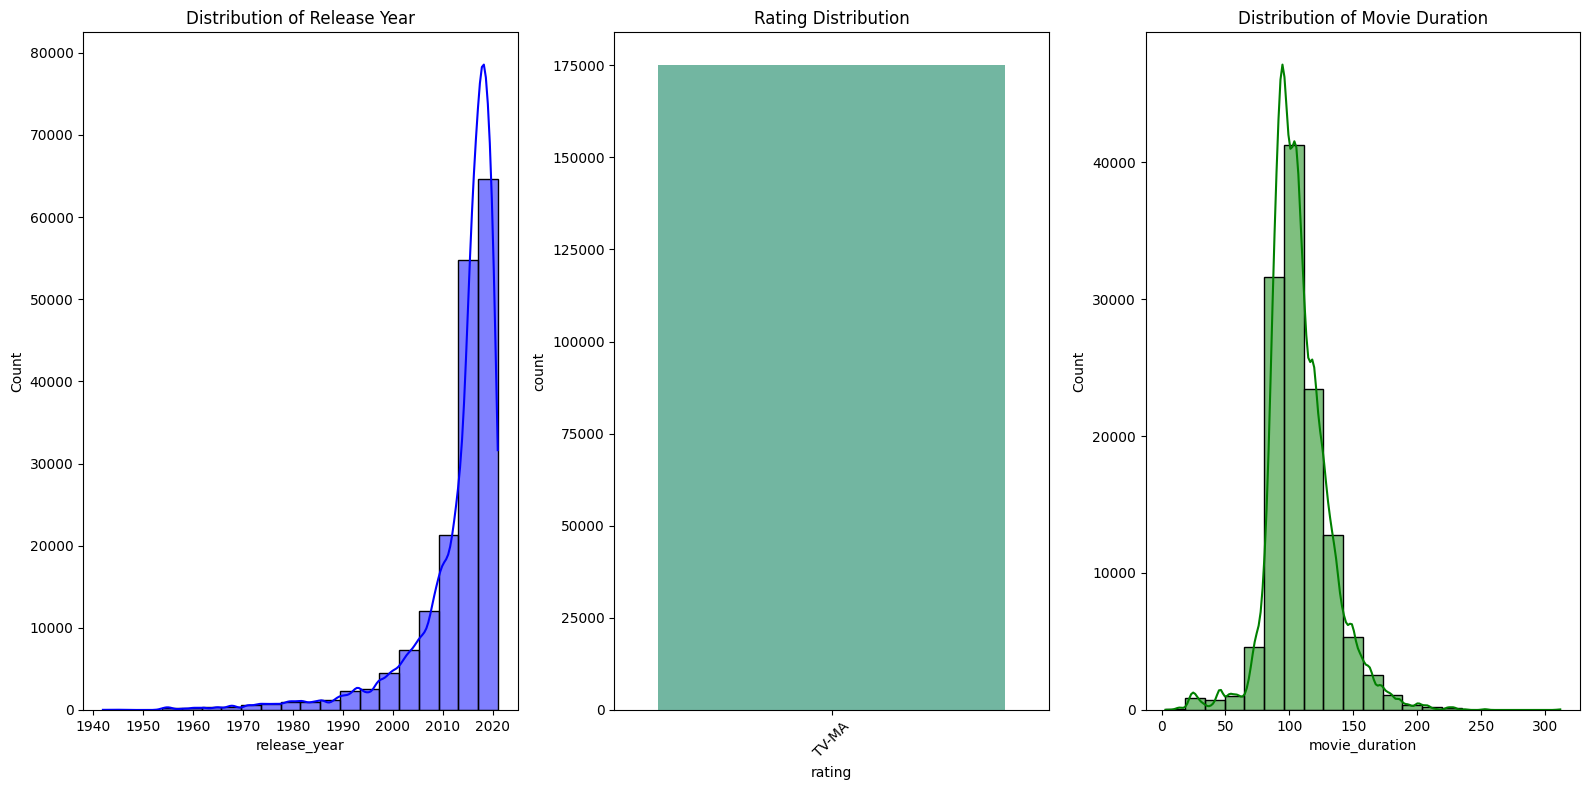

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(16, 8))

# 1. Distplot for 'release_year' (continuous variable)
plt.subplot(1, 3, 1)
sns.histplot(df_clean['release_year'], kde=True, color='blue', bins=20)
plt.title('Distribution of Release Year')

# 2. Countplot for 'rating' (categorical variable)
plt.subplot(1, 3, 2)
sns.countplot(data=df_clean, x='rating', palette='Set2')
plt.title('Rating Distribution')
plt.xticks(rotation=45)

# 3. Histogram for 'movie_duration' (continuous variable)
plt.subplot(1, 3, 3)
sns.histplot(df_clean['movie_duration'].dropna(), kde=True, color='green', bins=20)
plt.title('Distribution of Movie Duration')

plt.tight_layout()
plt.show()

**For Categorical Variables: Boxplot**

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare 'movie_duration' across 'rating', 'type', 'cast', 'country', 'listed_in'
plt.figure(figsize=(18, 8))

# 1. Boxplot for 'movie_duration' vs. 'rating'
plt.subplot(2, 3, 1)
sns.boxplot(x='rating', y='movie_duration', data=df_clean, palette='Set2')
plt.title('Movie Duration by Rating')
plt.xticks(rotation=45)

# 2. Boxplot for 'movie_duration' vs. 'type' (Movie vs TV Show)
plt.subplot(2, 3, 2)
sns.boxplot(x='type', y='movie_duration', data=df_clean, palette='Set1')
plt.title('Movie Duration by Type')

# 3. Boxplot for 'movie_duration' vs. 'cast' (Exploded and cleaned)
plt.subplot(2, 3, 3)
sns.boxplot(x='cast', y='movie_duration', data=df_clean, palette='coolwarm', whis=1.5)
plt.title('Movie Duration by Cast')
plt.xticks(rotation=90)

# 4. Boxplot for 'movie_duration' vs. 'country' (Exploded and cleaned)
plt.subplot(2, 3, 4)
sns.boxplot(x='country', y='movie_duration', data=df_clean, palette='coolwarm', whis=1.5)
plt.title('Movie Duration by Country')
plt.xticks(rotation=90)

# 5. Boxplot for 'movie_duration' vs. 'listed_in' (Exploded and cleaned)
plt.subplot(2, 3, 5)
sns.boxplot(x='listed_in', y='movie_duration', data=df_clean, palette='Set3')
plt.title('Movie Duration by Genre')
plt.xticks(rotation=90)

# 6. Boxplot for 'num_seasons' vs. 'type' (for TV Shows)
plt.subplot(2, 3, 6)
sns.boxplot(x='type', y='num_seasons', data=df_clean, palette='Set2')
plt.title('Number of Seasons by Type')

# Ensure the layout is tight
plt.tight_layout()
plt.show()


<ipython-input-147-05d8d25878d7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='movie_duration', data=df_clean, palette='Set2')
<ipython-input-147-05d8d25878d7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='movie_duration', data=df_clean, palette='Set1')
<ipython-input-147-05d8d25878d7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cast', y='movie_duration', data=df_clean, palette='coolwarm', whis=1.5)
<ipython-input-147-05d8d25878d7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is 

ValueError: 
Joey Bada$$
         ^
ParseException: Expected end of text, found '$'  (at char 9), (line:1, col:10)

Error in callback <function _draw_all_if_interactive at 0x796998229760> (for post_execute):


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


ValueError: 
Joey Bada$$
         ^
ParseException: Expected end of text, found '$'  (at char 9), (line:1, col:10)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
Joey Bada$$
         ^
ParseException: Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 1800x800 with 6 Axes>

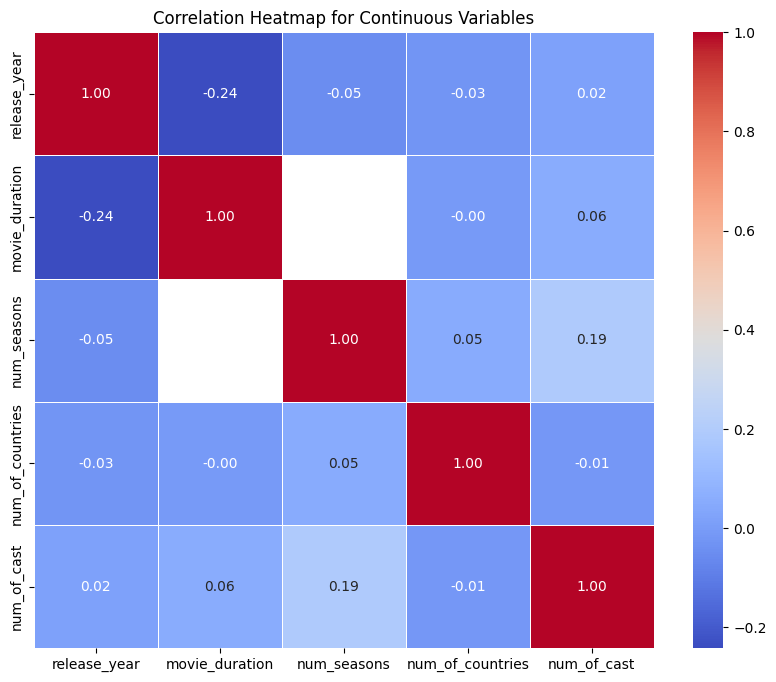

In [148]:
# Correlation heatmap for continuous variables
corr = df_clean[['release_year', 'movie_duration', 'num_seasons', 'num_of_countries', 'num_of_cast']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Continuous Variables')
plt.show()

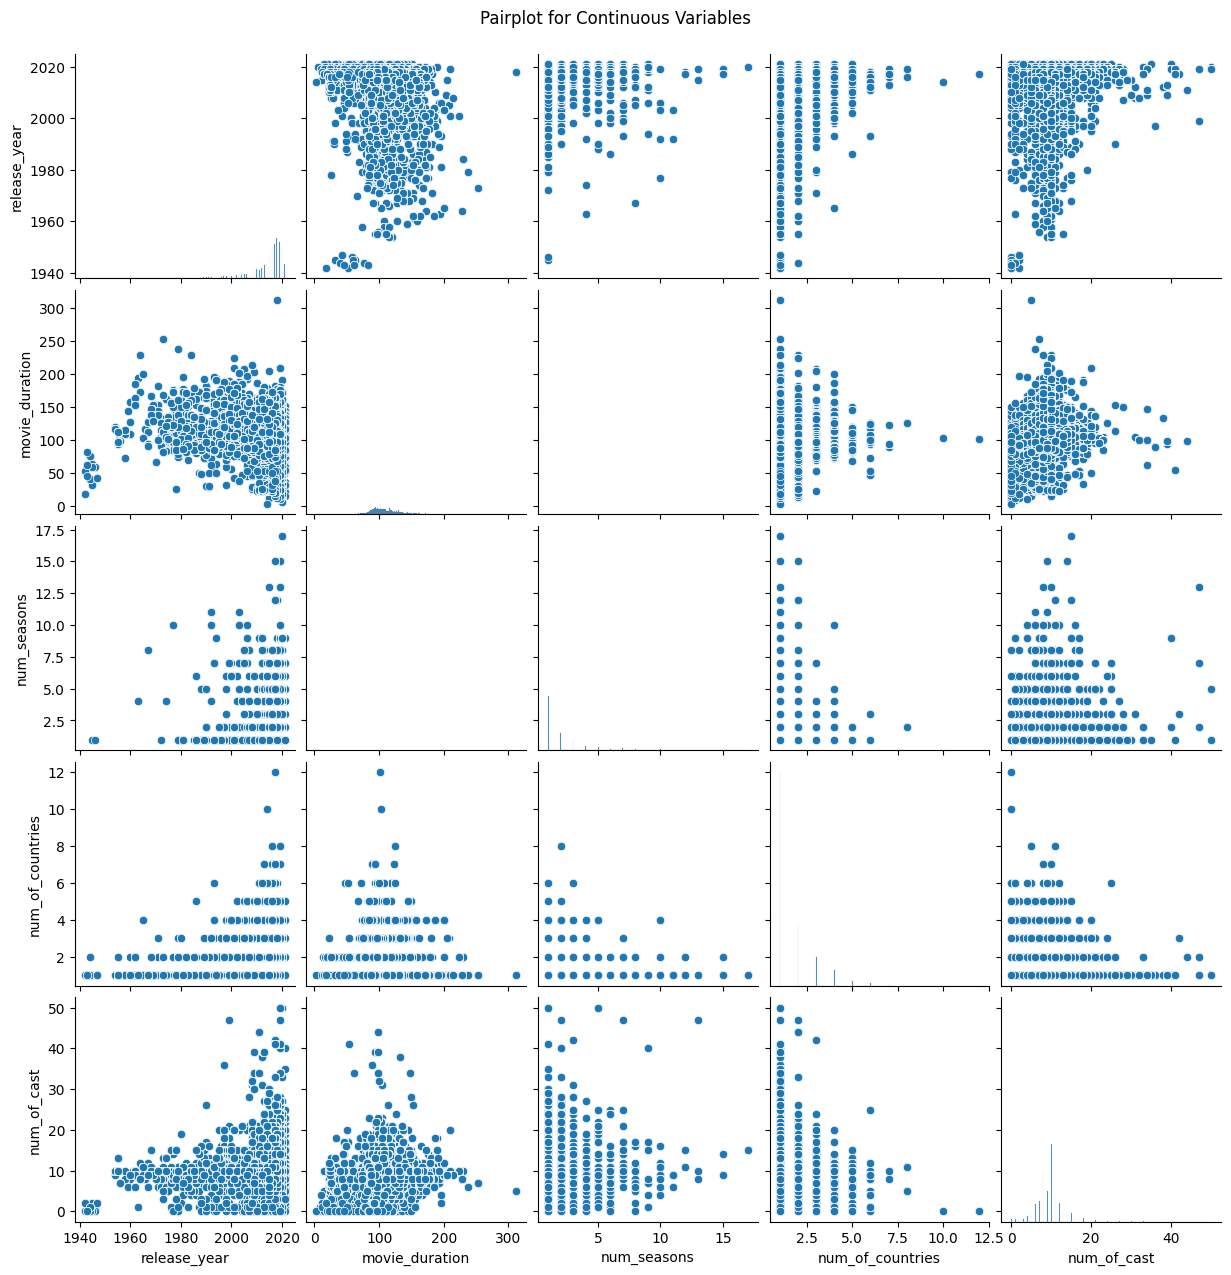

In [149]:
# Pairplot for continuous variables
sns.pairplot(df_clean[['release_year', 'movie_duration', 'num_seasons', 'num_of_countries', 'num_of_cast']])
plt.suptitle('Pairplot for Continuous Variables', y=1.02)
plt.show()

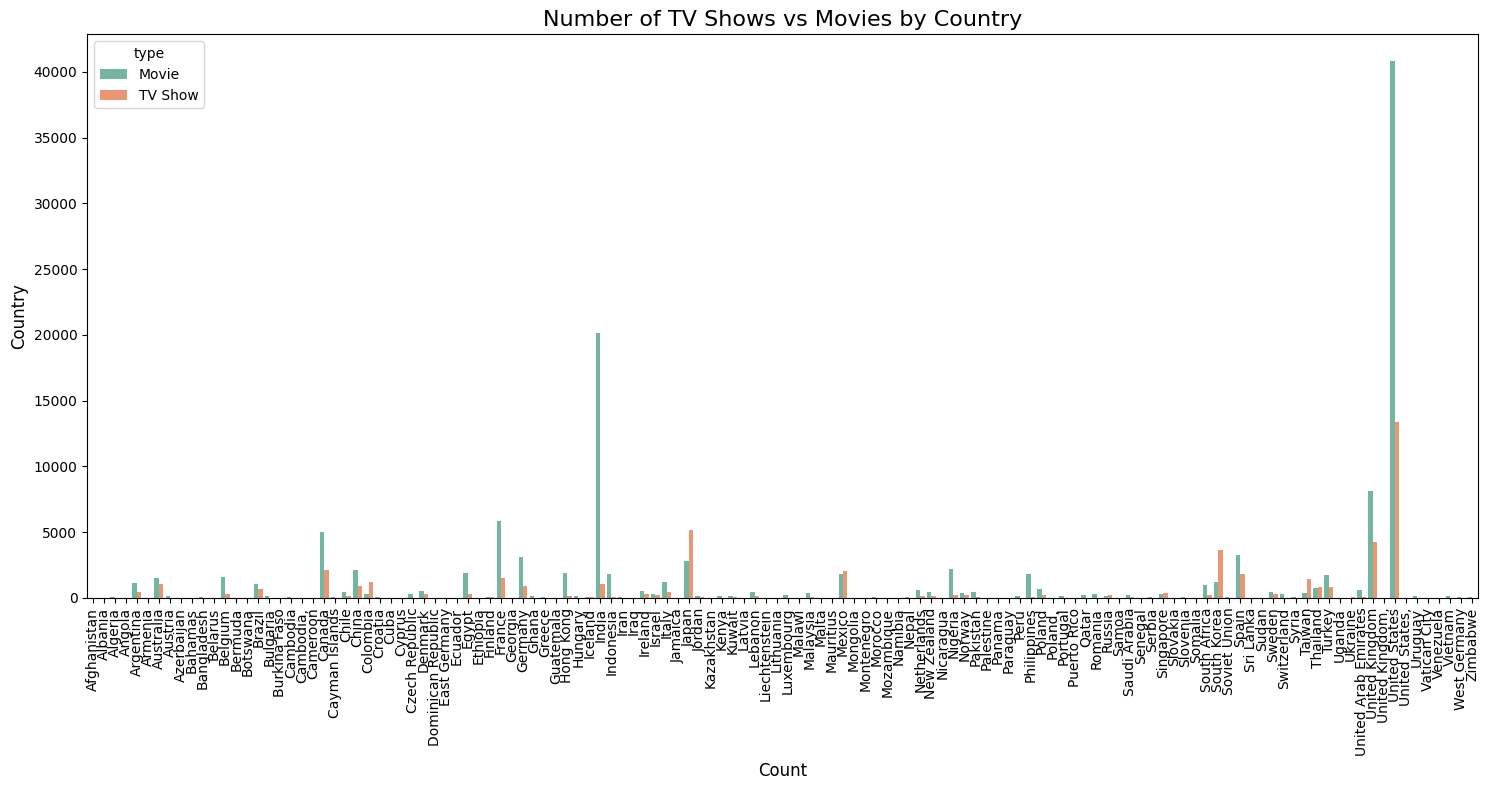

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode the 'country' column to separate countries into multiple rows
df_exploded = df_clean.explode('country')

# Filter the data for Movies and TV Shows
df_exploded_movie_tv = df_exploded[['country', 'type']]

# Count the number of Movies and TV Shows by Country
movie_tv_counts = df_exploded_movie_tv.groupby(['country', 'type']).size().reset_index(name='count')

# Create a bar plot for Movies vs TV Shows by Country
plt.figure(figsize=(15, 8))
sns.barplot(x='country', y='count', hue='type', data=movie_tv_counts, palette='Set2')

plt.title('Number of TV Shows vs Movies by Country', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

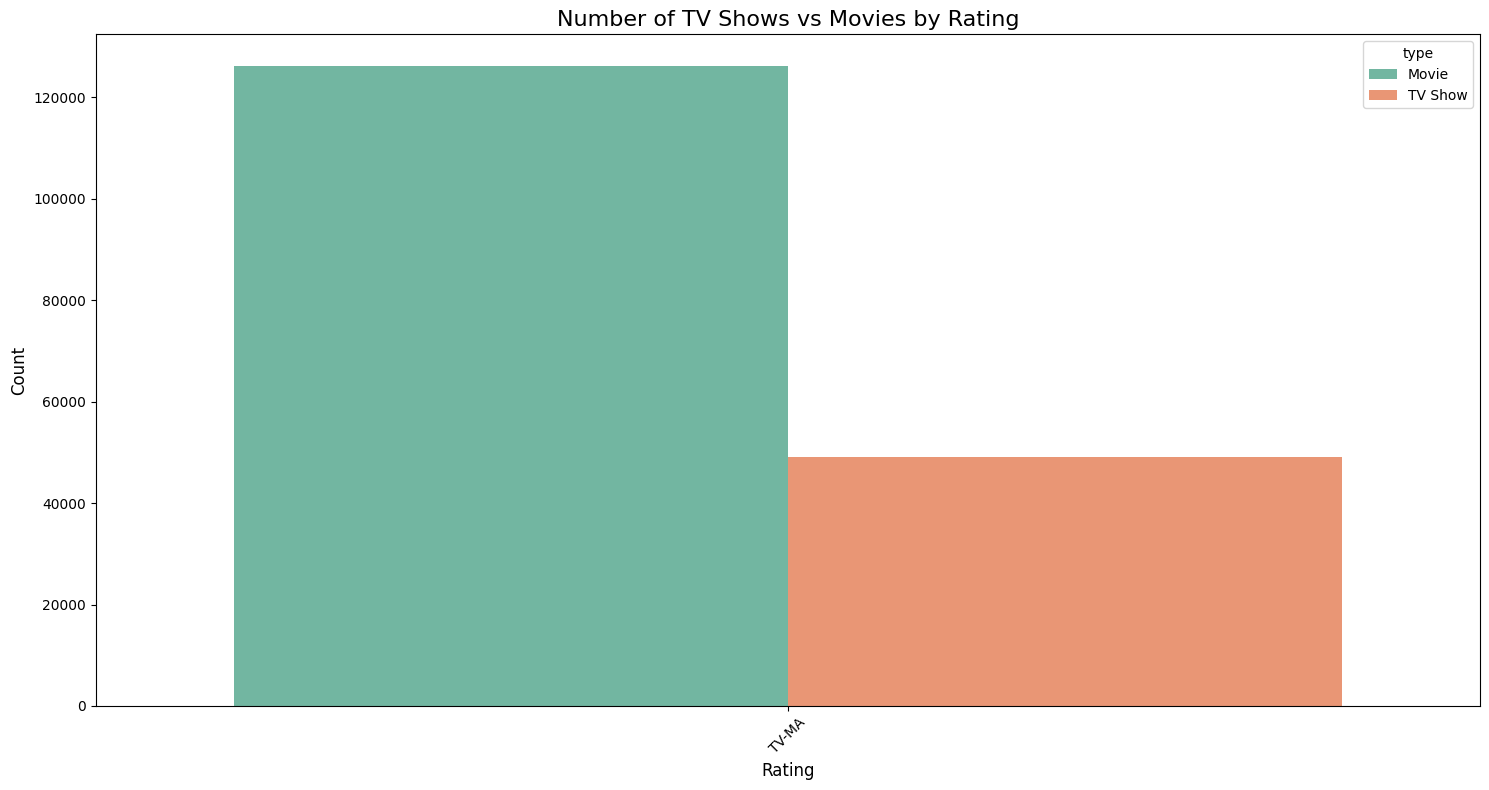

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the data for Movies and TV Shows, and group by 'rating' and 'type'
df_rating_counts = df_clean[['rating', 'type']]

# Remove any rows with missing ratings
df_rating_counts = df_rating_counts.dropna(subset=['rating'])

# Count the number of Movies and TV Shows by rating
rating_counts = df_rating_counts.groupby(['rating', 'type']).size().reset_index(name='count')

# Create a bar plot for Movies vs TV Shows by Rating
plt.figure(figsize=(15, 8))
sns.barplot(x='rating', y='count', hue='type', data=rating_counts, palette='Set2')

plt.title('Number of TV Shows vs Movies by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


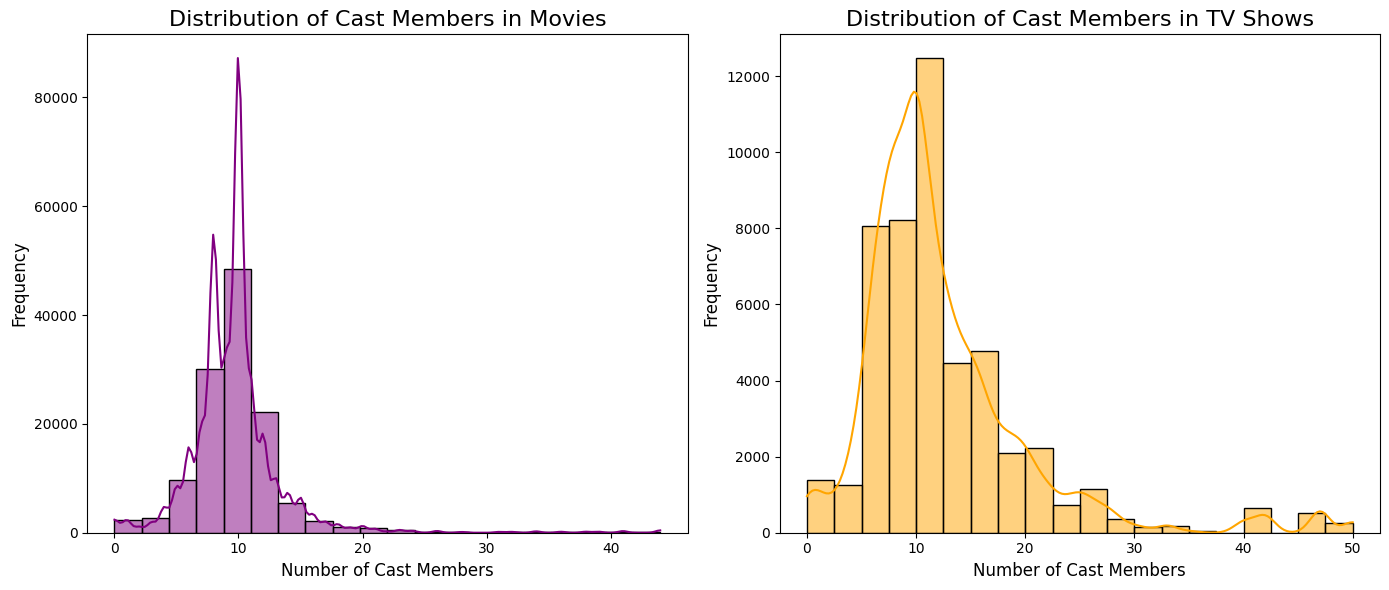

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data for Movies and TV Shows
movies_cast_count = df_clean[df_clean['type'] == 'Movie']['num_of_cast'].dropna()
tv_shows_cast_count = df_clean[df_clean['type'] == 'TV Show']['num_of_cast'].dropna()

# Create subplots for histograms
plt.figure(figsize=(14, 6))

# Histogram for Number of Cast in Movies
plt.subplot(1, 2, 1)
sns.histplot(movies_cast_count, bins=20, kde=True, color='purple')
plt.title('Distribution of Cast Members in Movies', fontsize=16)
plt.xlabel('Number of Cast Members', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Histogram for Number of Cast in TV Shows
plt.subplot(1, 2, 2)
sns.histplot(tv_shows_cast_count, bins=20, kde=True, color='orange')
plt.title('Distribution of Cast Members in TV Shows', fontsize=16)
plt.xlabel('Number of Cast Members', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

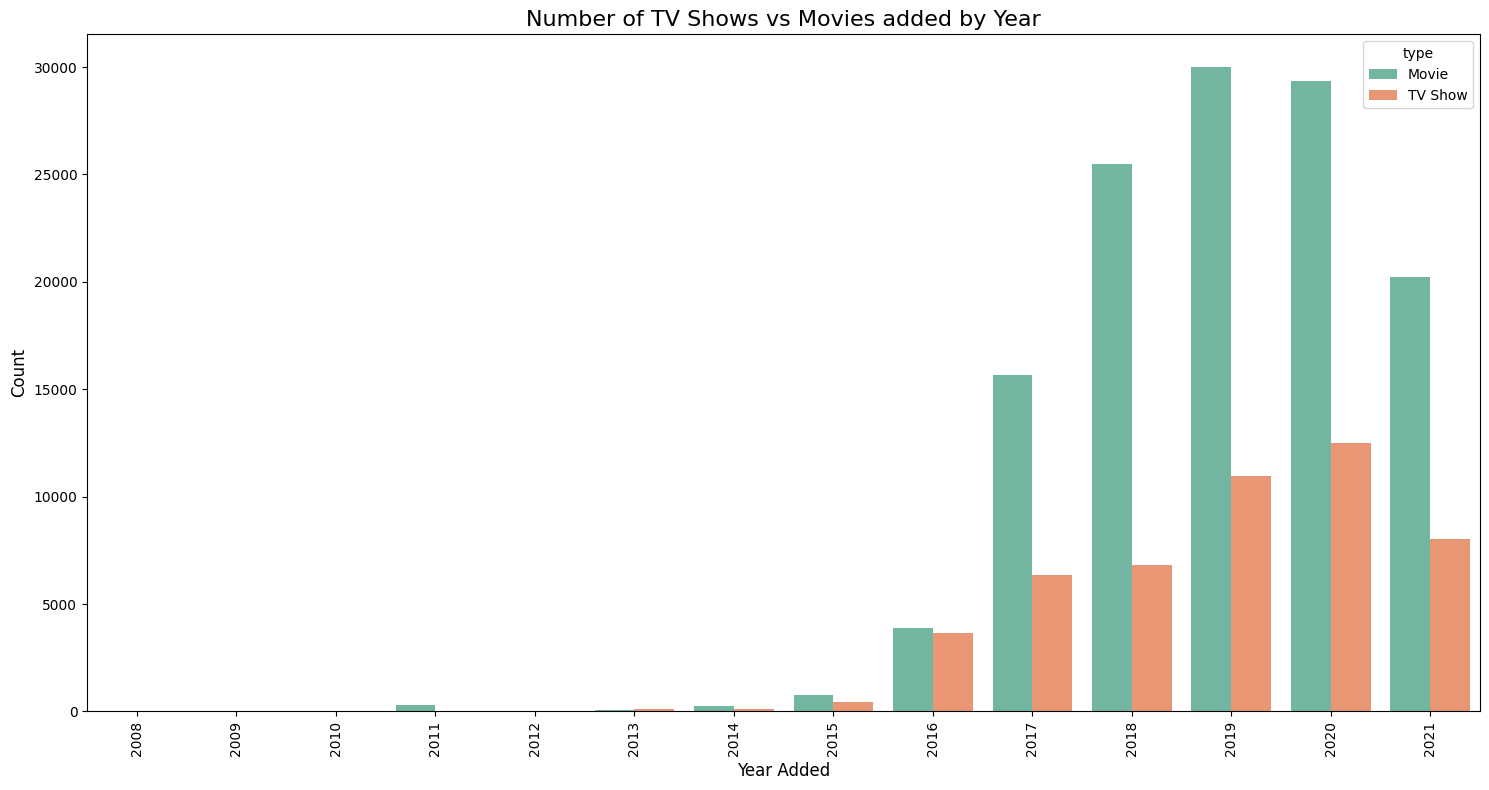

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'date_added' is in datetime format
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

# Extract the year from the 'date_added' column
df_clean['year_added'] = df_clean['date_added'].dt.year

# Filter the data for Movies and TV Shows, and group by 'year_added' and 'type'
df_year_added = df_clean[['year_added', 'type']]

# Count the number of Movies and TV Shows by year
year_tv_counts = df_year_added.groupby(['year_added', 'type']).size().reset_index(name='count')

# Create a bar plot for Movies vs TV Shows by Year Added
plt.figure(figsize=(15, 8))
sns.barplot(x='year_added', y='count', hue='type', data=year_tv_counts, palette='Set2')

plt.title('Number of TV Shows vs Movies added by Year', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

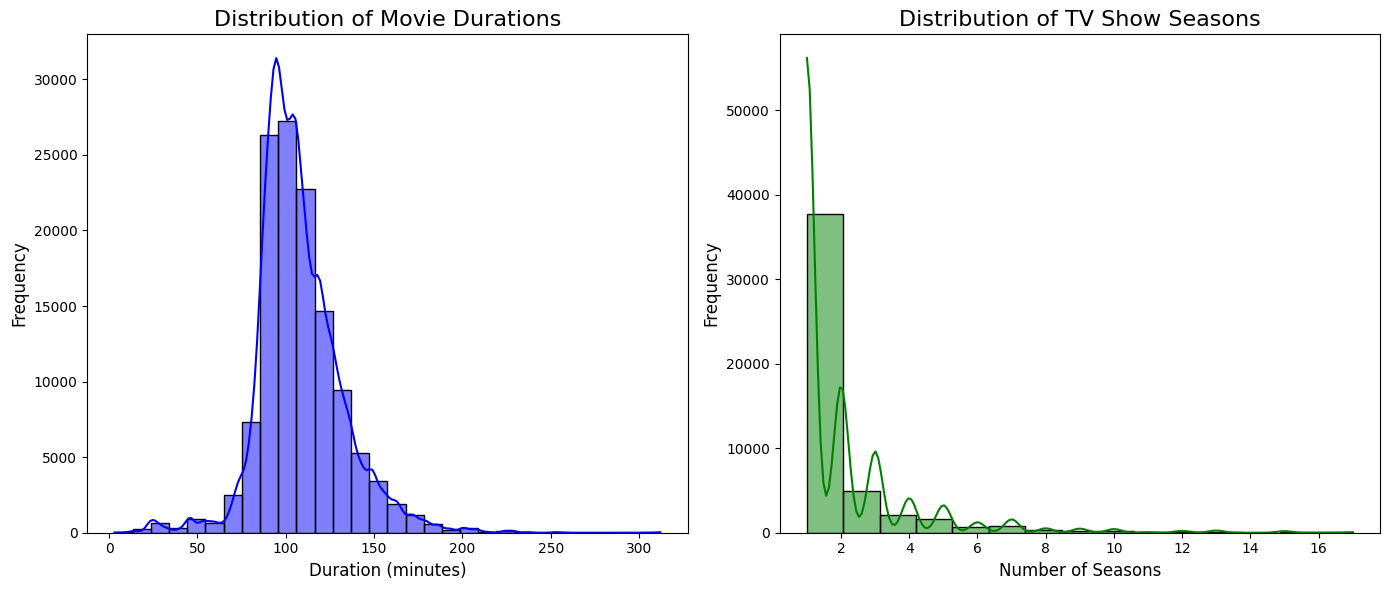

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate Movies and TV Shows data
movies_duration = df_clean[df_clean['type'] == 'Movie']['movie_duration'].dropna()
tv_shows_seasons = df_clean[df_clean['type'] == 'TV Show']['num_seasons'].dropna()

# Create subplots for histograms
plt.figure(figsize=(14, 6))

# Histogram for Movie Duration
plt.subplot(1, 2, 1)
sns.histplot(movies_duration, bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Histogram for TV Show Seasons
plt.subplot(1, 2, 2)
sns.histplot(tv_shows_seasons, bins=15, kde=True, color='green')
plt.title('Distribution of TV Show Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

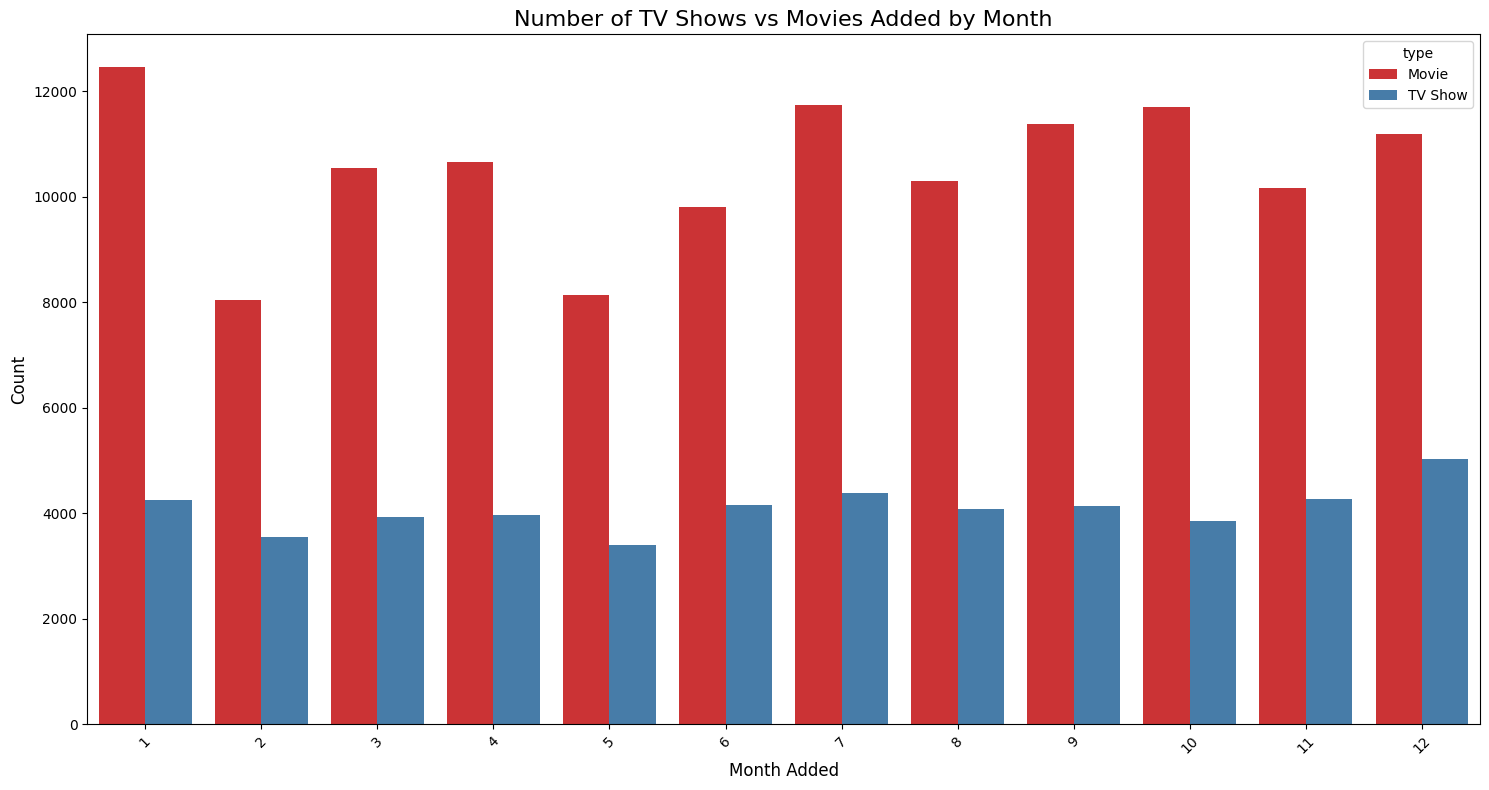

In [156]:
# Count the number of Movies and TV Shows added in each month
df_monthly_counts = df_clean.groupby(['added_month', 'type']).size().reset_index(name='count')

# Create a bar plot for Movies vs TV Shows by Month Added
plt.figure(figsize=(15, 8))
sns.barplot(x='added_month', y='count', hue='type', data=df_monthly_counts, palette='Set1')

plt.title('Number of TV Shows vs Movies Added by Month', fontsize=16)
plt.xlabel('Month Added', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Outlier Check:**

In [157]:
# Remove duplicates based on show_id to avoid overcounting when calculating outliers
df_clean_unique = df_clean.drop_duplicates(subset='show_id')

# Now let's check for outliers in movie_duration and num_seasons
# Using the IQR method to check for outliers in the 'movie_duration' and 'num_seasons' columns
def remove_outliers(df, column):
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for 'movie_duration' and 'num_seasons' columns (based on unique shows)
df_clean_unique_no_outliers = remove_outliers(df_clean_unique, 'movie_duration')
df_clean_unique_no_outliers = remove_outliers(df_clean_unique_no_outliers, 'num_seasons')

# Display summary of data after removing outliers
print("\nData summary after removing outliers:\n")
print(df_clean_unique_no_outliers.describe())


Data summary after removing outliers:

      date_added  release_year  added_year  added_month  added_day  \
count          0           0.0         0.0          0.0        0.0   
mean         NaT           NaN         NaN          NaN        NaN   
min          NaT           NaN         NaN          NaN        NaN   
25%          NaT           NaN         NaN          NaN        NaN   
50%          NaT           NaN         NaN          NaN        NaN   
75%          NaT           NaN         NaN          NaN        NaN   
max          NaT           NaN         NaN          NaN        NaN   
std          NaN           NaN         NaN          NaN        NaN   

       years_until_added  movie_duration  num_seasons  num_of_countries  \
count                0.0             0.0          0.0               0.0   
mean                 NaN             NaN          NaN               NaN   
min                  NaN             NaN          NaN               NaN   
25%                  NaN     

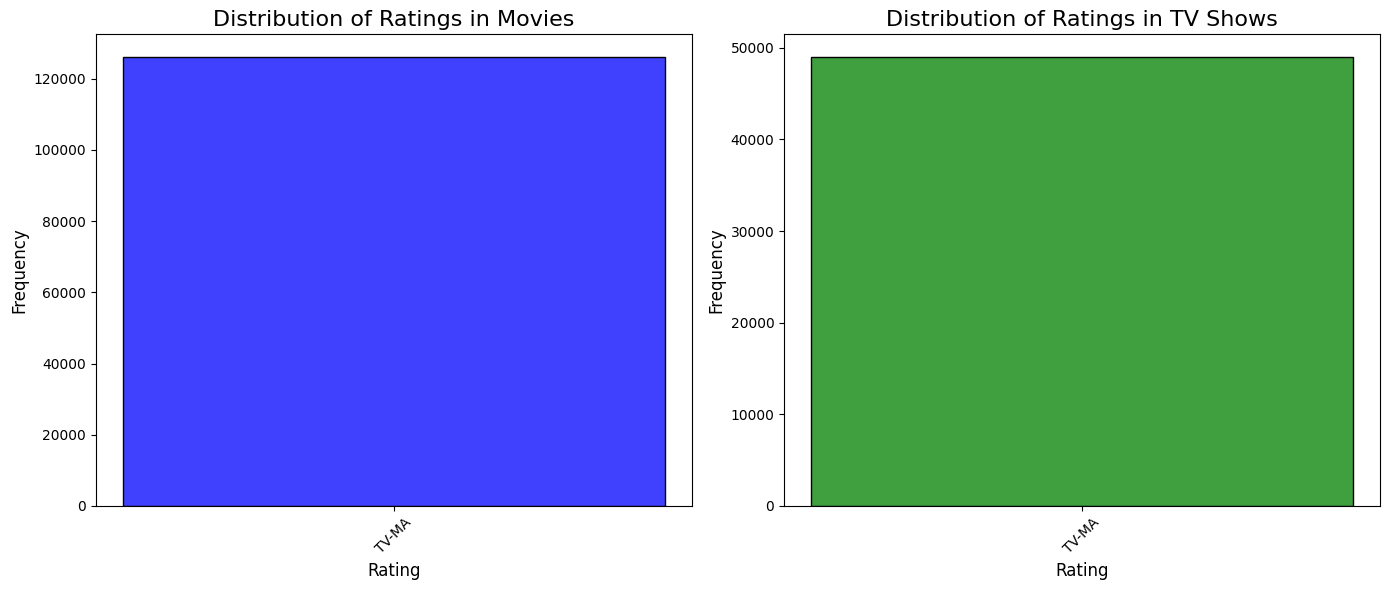

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data for Movies and TV Shows
movies_rating = df_clean[df_clean['type'] == 'Movie']['rating'].dropna()
tv_shows_rating = df_clean[df_clean['type'] == 'TV Show']['rating'].dropna()

# Create subplots for histograms
plt.figure(figsize=(14, 6))

# Histogram for Ratings in Movies
plt.subplot(1, 2, 1)
sns.histplot(movies_rating, kde=False, color='blue', discrete=True)
plt.title('Distribution of Ratings in Movies', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)

# Histogram for Ratings in TV Shows
plt.subplot(1, 2, 2)
sns.histplot(tv_shows_rating, kde=False, color='green', discrete=True)
plt.title('Distribution of Ratings in TV Shows', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-159-a5a1a348be1b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


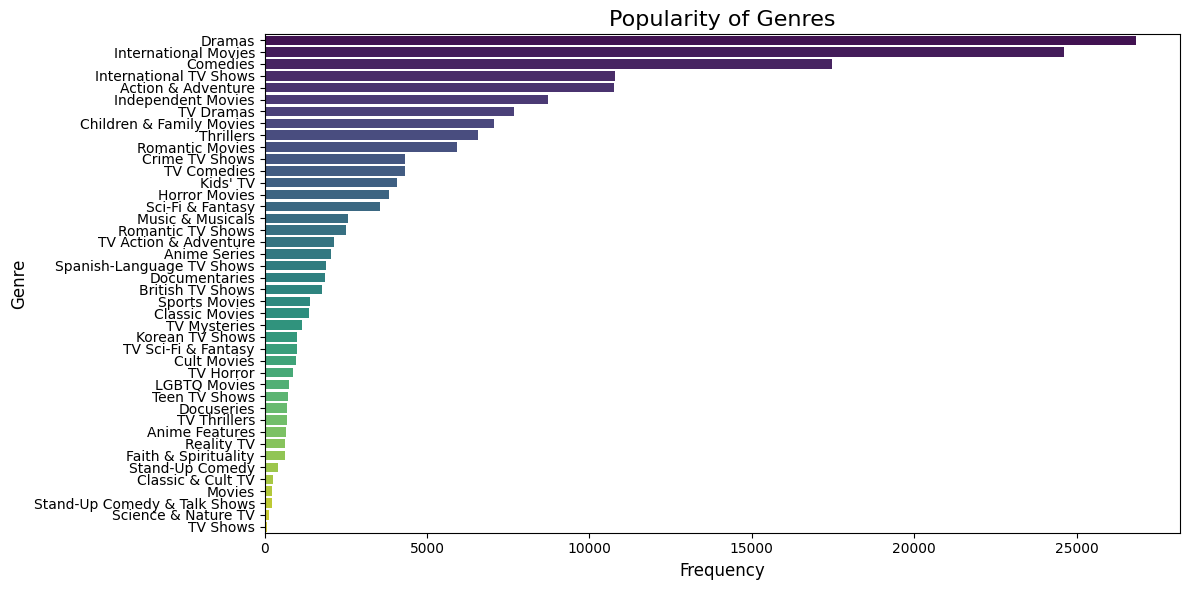

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each genre
genre_counts = df_clean['listed_in'].value_counts()

# Plot the genre popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')

plt.title('Popularity of Genres', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-160-eb8dd7d44e60>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier_' + column] = df[column].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Non-Outlier')
<ipython-input-160-eb8dd7d44e60>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier_' + column] = df[column].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Non-Outlier')



Number of outliers detected in 'movie_duration': 369
Number of outliers detected in 'num_seasons': 253


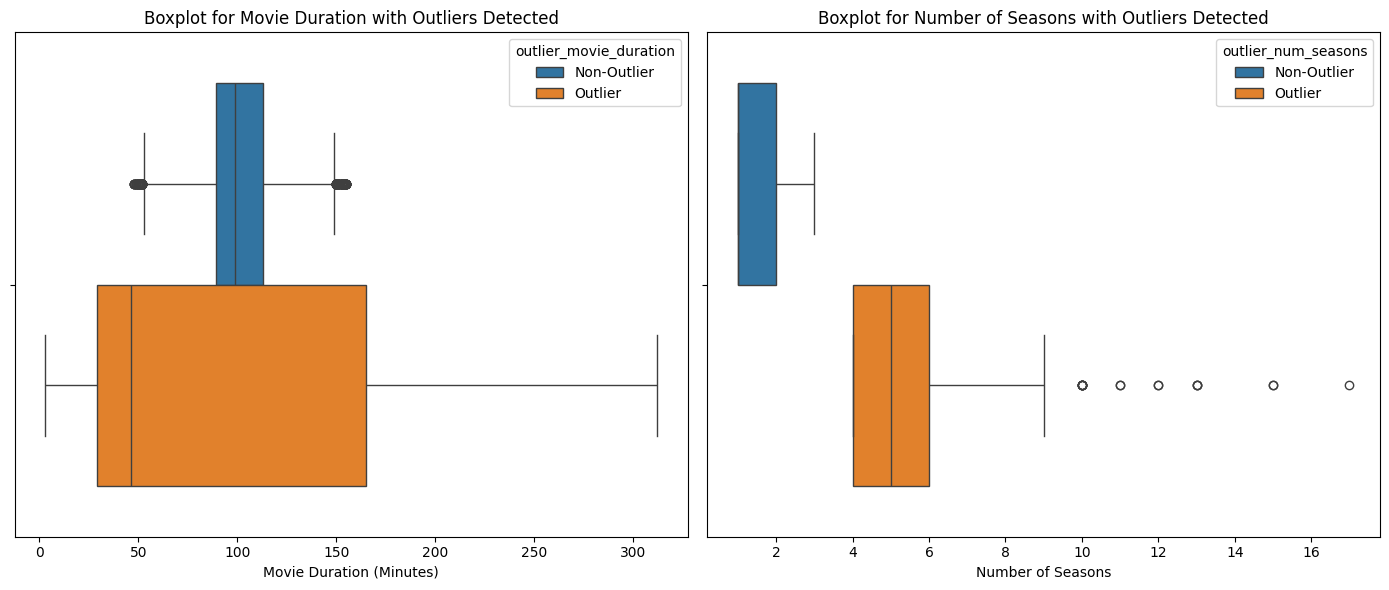

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicates based on 'show_id' to avoid overcounting
df_clean_unique = df_clean.drop_duplicates(subset='show_id')

# Function to detect outliers based on IQR
def detect_outliers(df, column):
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers (flagging values outside the IQR range)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Mark outliers in the dataframe (this will add a column for outlier detection)
    df['outlier_' + column] = df[column].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Non-Outlier')

    return df, outliers

# Detect outliers in 'movie_duration' and 'num_seasons'
df_clean_unique, outliers_movie_duration = detect_outliers(df_clean_unique, 'movie_duration')
df_clean_unique, outliers_num_seasons = detect_outliers(df_clean_unique, 'num_seasons')

# Check how many outliers were detected
print(f"\nNumber of outliers detected in 'movie_duration': {outliers_movie_duration.shape[0]}")
print(f"Number of outliers detected in 'num_seasons': {outliers_num_seasons.shape[0]}")

# Visualizing the outliers using boxplots (with the flag for outliers)

# Plot boxplots for movies (movie_duration)
plt.figure(figsize=(14, 6))

# Boxplot for 'movie_duration' with outliers marked
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean_unique['movie_duration'], hue=df_clean_unique['outlier_movie_duration'])
plt.title('Boxplot for Movie Duration with Outliers Detected')
plt.xlabel('Movie Duration (Minutes)')

# Boxplot for 'num_seasons' with outliers marked
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean_unique['num_seasons'], hue=df_clean_unique['outlier_num_seasons'])
plt.title('Boxplot for Number of Seasons with Outliers Detected')
plt.xlabel('Number of Seasons')

plt.tight_layout()
plt.show()


In [161]:
# Find the minimum and maximum movie durations
min_movie_duration = df_clean['movie_duration'].min()
max_movie_duration = df_clean['movie_duration'].max()

# Print the results
print(f"Minimum Movie Duration: {min_movie_duration} minutes")
print(f"Maximum Movie Duration: {max_movie_duration} minutes")


Minimum Movie Duration: 3.0 minutes
Maximum Movie Duration: 312.0 minutes


In [162]:
# Ensure to group by relevant columns after exploding
df_clean_unique = df_clean.drop_duplicates(subset='show_id')  # Drop duplicates after explode to avoid overcounting

# 1. Distribution of content types (Movies vs TV Shows)
content_type_counts = df_clean_unique['type'].value_counts()
print("Content Type Distribution:\n", content_type_counts)

# 2. Rating distribution by content type (Movies vs TV Shows)
rating_by_type = df_clean_unique.groupby('type')['rating'].value_counts().unstack().fillna(0)
print("\nRating Distribution by Content Type:\n", rating_by_type)

# 3. Top countries producing content (After explosion to handle multiple countries)
country_counts = df_clean_unique['country'].value_counts().head(10)
print("\nTop 10 Countries Producing Content:\n", country_counts)

# 4. Average movie duration by genre and content type
# Group by 'listed_in' (genres) and 'type', and calculate mean movie duration
avg_duration_by_genre = df_clean_unique.groupby(['listed_in', 'type'])['movie_duration'].mean().reset_index()
print("\nAverage Movie Duration by Genre and Content Type:\n", avg_duration_by_genre)

# 5. Top genres of movies/TV shows (After explosion)
genre_counts = df_clean_unique['listed_in'].value_counts().head(10)
print("\nTop 10 Genres in the Dataset:\n", genre_counts)

# 6. Average number of seasons for TV Shows
avg_seasons = df_clean_unique[df_clean_unique['type'] == 'TV Show']['num_seasons'].mean()
print("\nAverage Number of Seasons for TV Shows:", avg_seasons)

# 7. Insights on missing values
missing_values_summary = df_clean.isnull().sum()
print("\nSummary of Missing Values:\n", missing_values_summary)

# 8. Insights on duration for movies (using IQR method)
# Calculate IQR and identify outliers for movie_duration
Q1 = df_clean_unique['movie_duration'].quantile(0.25)
Q3 = df_clean_unique['movie_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean_unique[(df_clean_unique['movie_duration'] < lower_bound) | (df_clean_unique['movie_duration'] > upper_bound)]
print("\nOutliers in Movie Duration:\n", outliers[['title', 'movie_duration']])


Content Type Distribution:
 type
Movie      5691
TV Show    2285
Name: count, dtype: int64

Rating Distribution by Content Type:
 rating   TV-MA
type          
Movie     5691
TV Show   2285

Top 10 Countries Producing Content:
 country
United States     2820
India             1016
United Kingdom     542
Canada             427
Japan              283
France             268
South Korea        211
Australia          159
Spain              157
Mexico             145
Name: count, dtype: int64

Average Movie Duration by Genre and Content Type:
                        listed_in     type  movie_duration
0             Action & Adventure    Movie      112.271726
1                 Anime Features    Movie       93.368421
2                   Anime Series  TV Show             NaN
3               British TV Shows  TV Show             NaN
4       Children & Family Movies    Movie       81.558000
5              Classic & Cult TV  TV Show             NaN
6                 Classic Movies    Movie      114

In [163]:
# Distribution of movies and TV shows
type_distribution = df_clean['type'].value_counts()

# Average movie duration by type
avg_duration_by_type = df_clean.groupby('type')['movie_duration'].mean()

print(f"\nDistribution of Movies vs TV Shows:\n{type_distribution}")
print(f"\nAverage Movie Duration by Type:\n{avg_duration_by_type}")


Distribution of Movies vs TV Shows:
type
Movie      126125
TV Show     49023
Name: count, dtype: int64

Average Movie Duration by Type:
type
Movie      107.768642
TV Show           NaN
Name: movie_duration, dtype: float64


**Top Countries Producing Content**

<ipython-input-164-f5054d110493>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


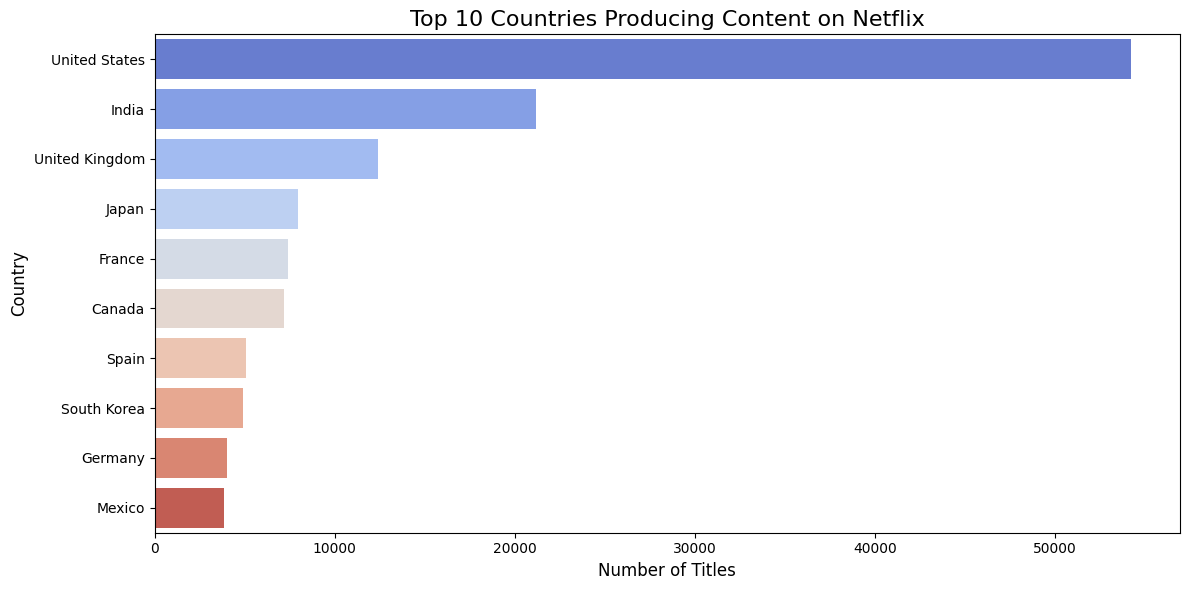

In [164]:
# Count the number of content pieces by country
top_countries = df_clean['country'].value_counts().head(10)

# Plot top countries producing content
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')

plt.title('Top 10 Countries Producing Content on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


**Regional Trends: Movies vs. TV Shows**

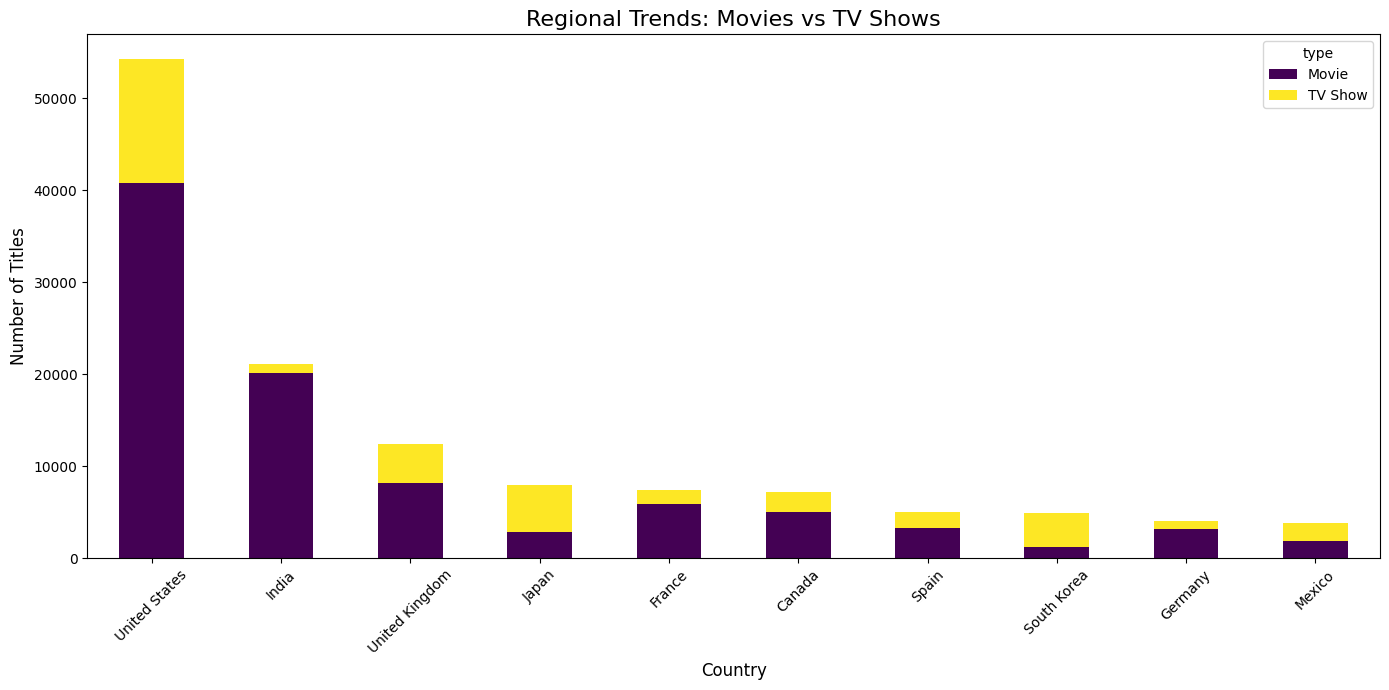

In [165]:
# Group by country and type to count movies and TV shows
regional_trends = df_clean.groupby(['country', 'type']).size().unstack(fill_value=0)

# Plot regional trends in movies vs. TV shows
regional_trends_top = regional_trends.loc[top_countries.index]

regional_trends_top.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Regional Trends: Movies vs TV Shows', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Region-Specific Genre Preferences**

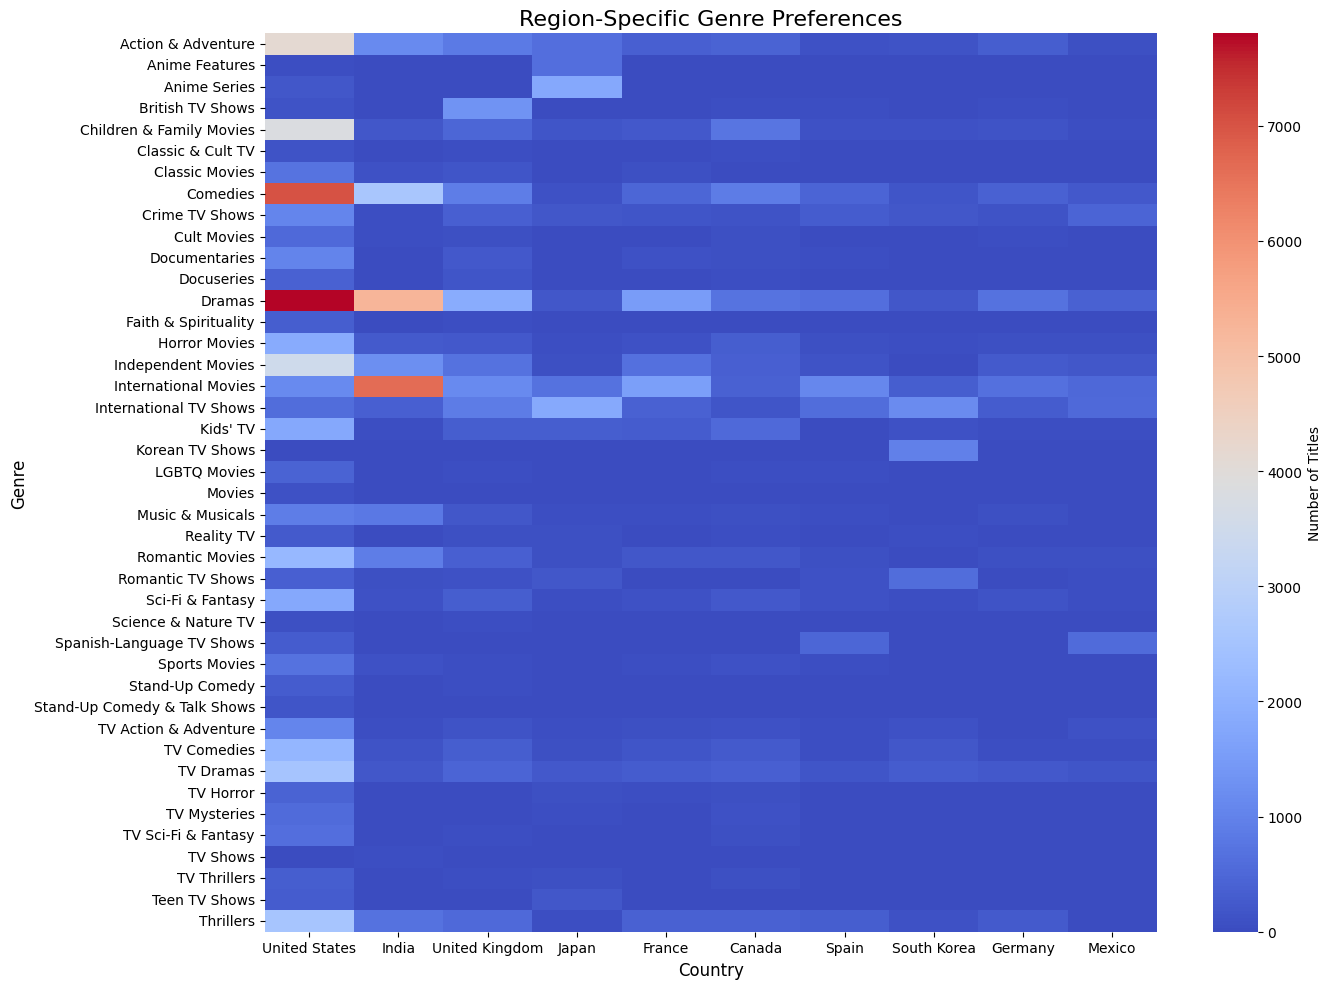

In [166]:
# Group by country and genre, count the number of titles
region_genre = df_clean.groupby(['country', 'listed_in']).size().unstack(fill_value=0)

# Plot heatmap for region-specific genre preferences
plt.figure(figsize=(14, 10))
sns.heatmap(region_genre.loc[top_countries.index].T, cmap='coolwarm', cbar_kws={'label': 'Number of Titles'}, annot=False)

plt.title('Region-Specific Genre Preferences', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

In [168]:
# Determine if a title is multi-country or single-country
df_clean['is_multi_country'] = df_clean['num_of_countries'] > 1

# Count titles for multi-country vs. single-country content
collaboration_counts = df_clean['is_multi_country'].value_counts()

# Rename the index for clarity
collaboration_counts.index = ['Single-Country', 'Multi-Country']

<ipython-input-169-15cbbb82b2bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=collaboration_counts.index, y=collaboration_counts.values, palette='Set2')


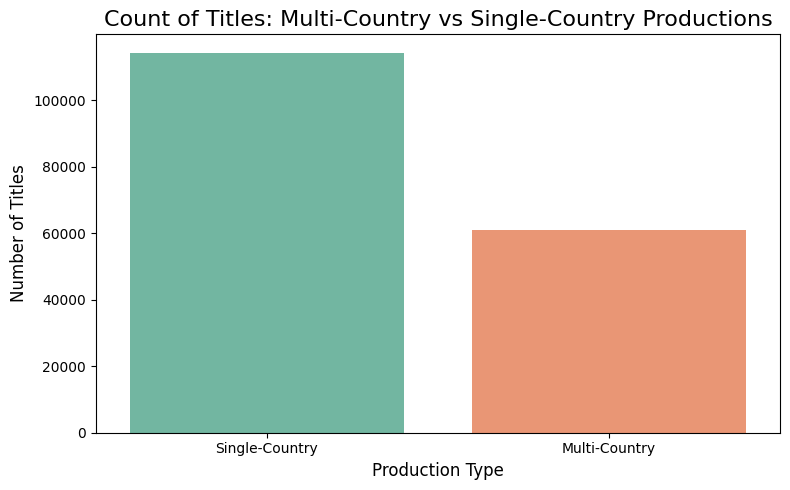

In [169]:
# Bar chart for multi-country vs single-country content
plt.figure(figsize=(8, 5))
sns.barplot(x=collaboration_counts.index, y=collaboration_counts.values, palette='Set2')

plt.title('Count of Titles: Multi-Country vs Single-Country Productions', fontsize=16)
plt.xlabel('Production Type', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.tight_layout()
plt.show()

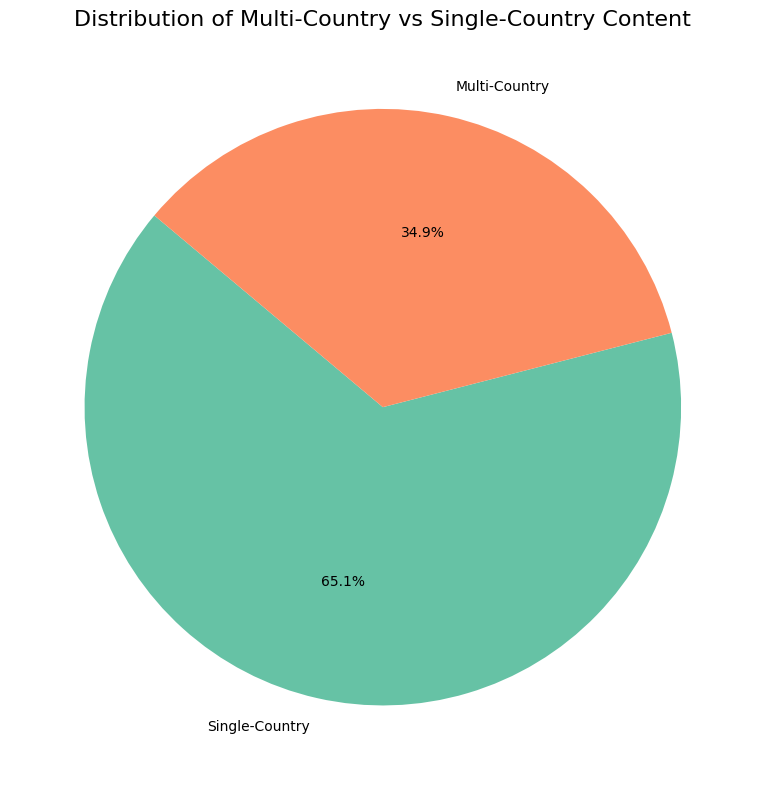

In [170]:
# Pie chart for distribution
plt.figure(figsize=(8, 8))
collaboration_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])

plt.title('Distribution of Multi-Country vs Single-Country Content', fontsize=16)
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.tight_layout()
plt.show()

**Key Contributors:**


*   Top Directors and Actors Across Netflix's Catalogue
*   Bar chart for the most frequent directors and actors.




<ipython-input-171-500d85f46cbf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')


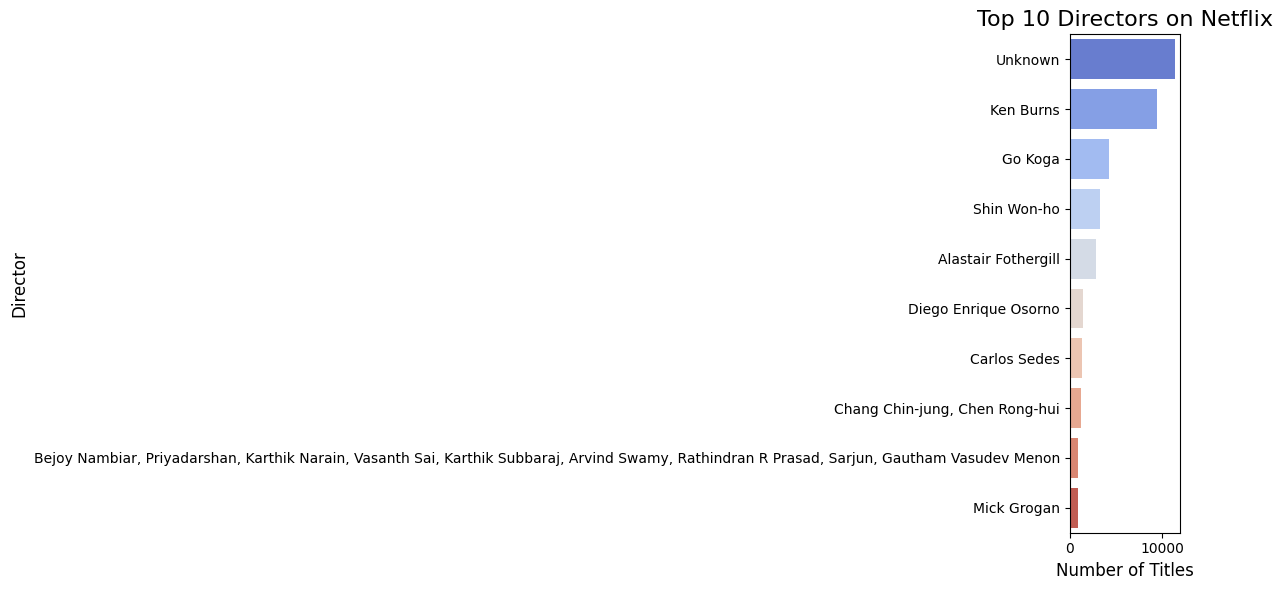

<ipython-input-171-500d85f46cbf>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')


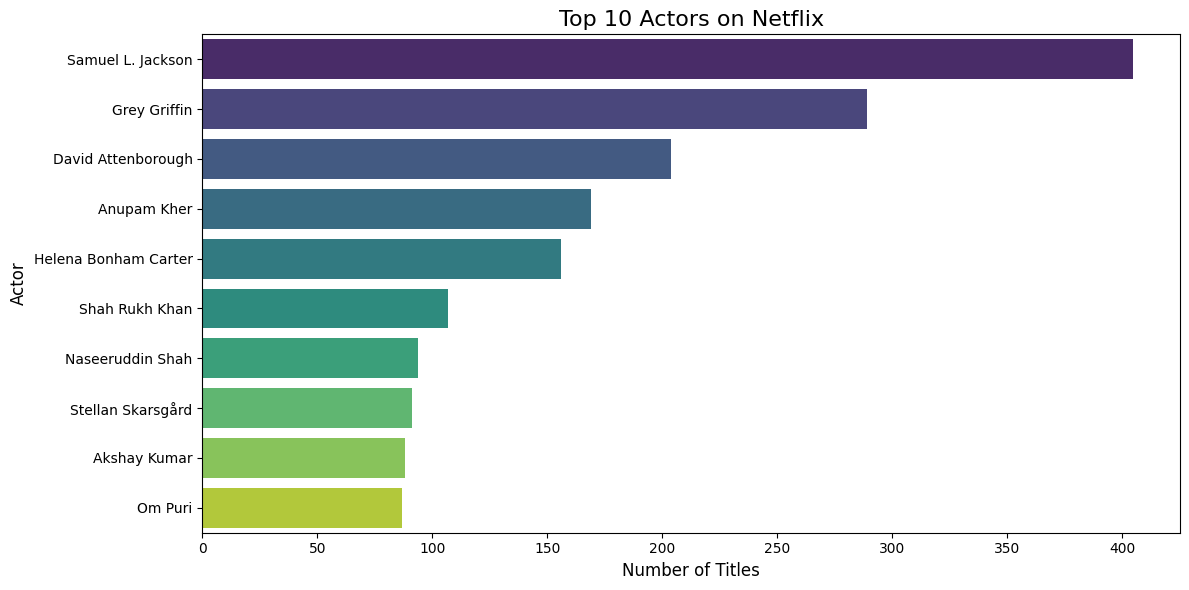

In [171]:
# Count the top 10 directors
top_directors = df_clean['director'].value_counts().head(10)

# Count the top 10 actors (consider the exploded 'cast' column for individual actors)
top_actors = df_clean.explode('cast')['cast'].value_counts().head(10)

# Plot top directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

# Plot top actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.title('Top 10 Actors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()
plt.show()

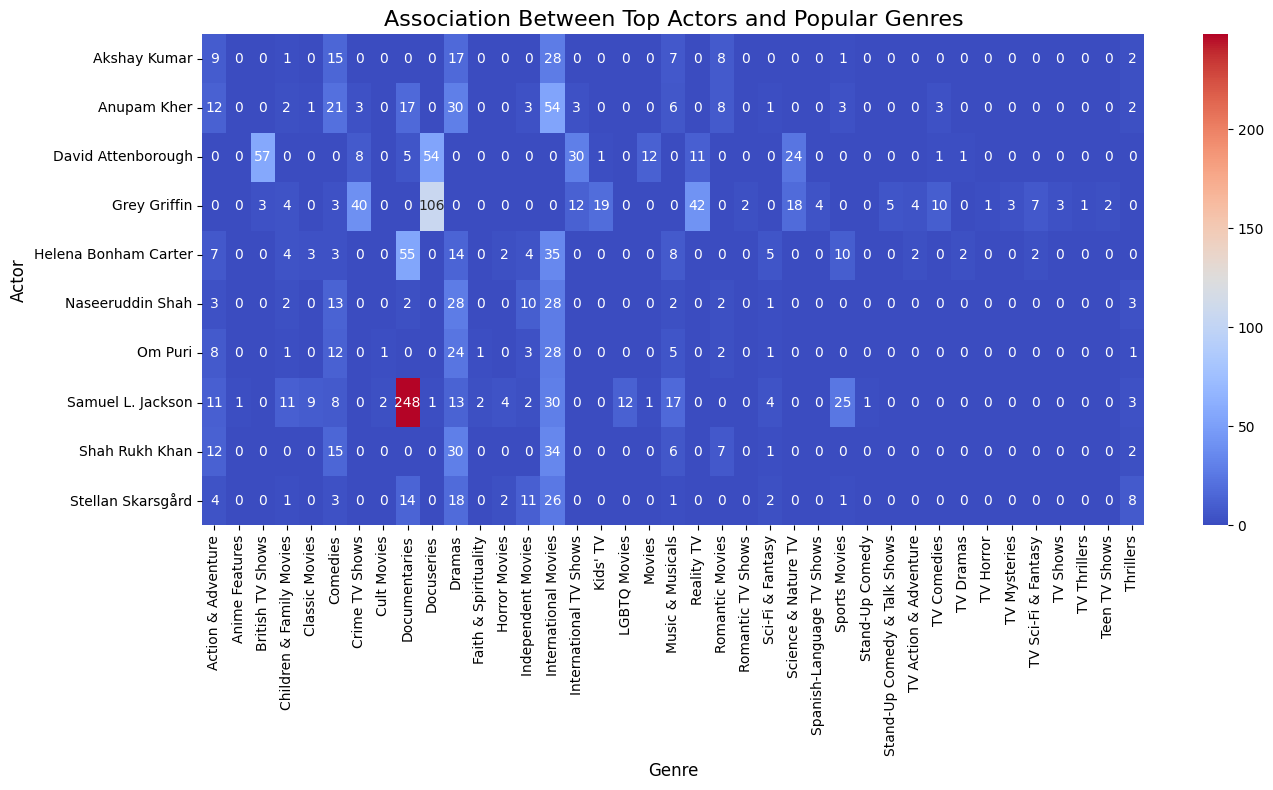

In [172]:
# Explode the 'listed_in' column for genre-level analysis
df_genre = df_clean.explode('listed_in')

# Analyze top actors in association with genres
top_actor_genres = df_genre[df_genre['cast'].isin(top_actors.index)]
actor_genre_counts = top_actor_genres.groupby(['cast', 'listed_in']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(actor_genre_counts, cmap='coolwarm', annot=True, fmt='d', cbar=True)
plt.title('Association Between Top Actors and Popular Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-173-2d32ae7bbdbb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_cast_size.index, y=average_cast_size.values, palette='Set2')


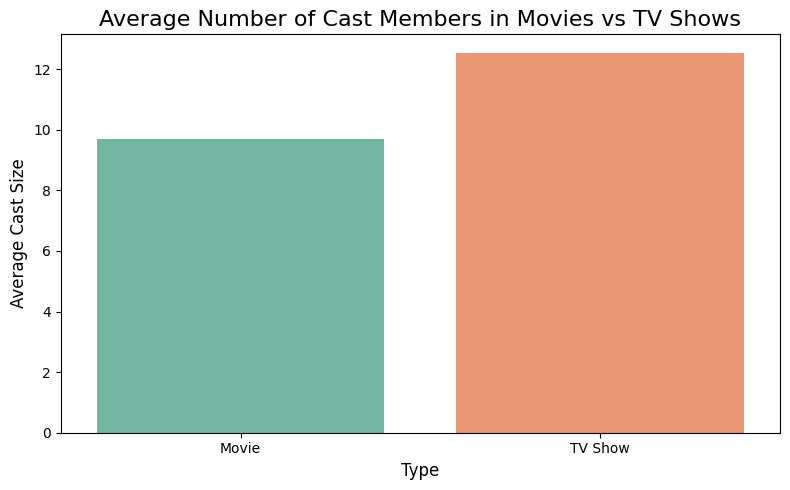

In [173]:
# Group by 'type' to calculate the average cast size
average_cast_size = df_clean.groupby('type')['num_of_cast'].mean()

# Bar chart for average cast size
plt.figure(figsize=(8, 5))
sns.barplot(x=average_cast_size.index, y=average_cast_size.values, palette='Set2')
plt.title('Average Number of Cast Members in Movies vs TV Shows', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Average Cast Size', fontsize=12)
plt.tight_layout()
plt.show()


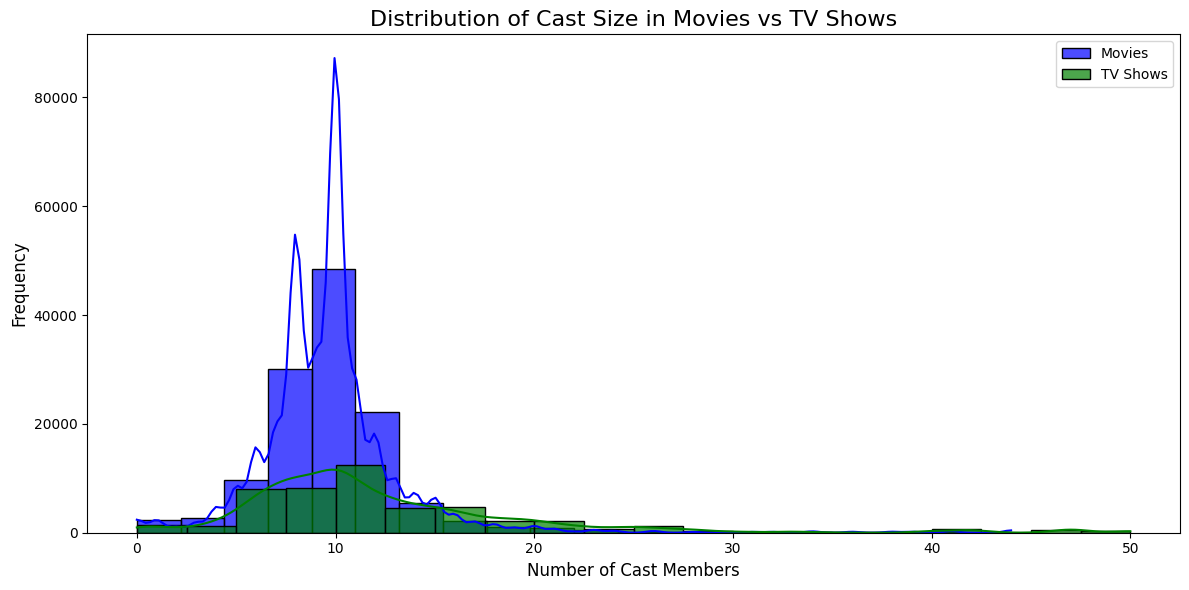

In [174]:
# Separate movies and TV shows for comparison
movies_cast_size = df_clean[df_clean['type'] == 'Movie']['num_of_cast']
tvshows_cast_size = df_clean[df_clean['type'] == 'TV Show']['num_of_cast']

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(movies_cast_size, bins=20, color='blue', kde=True, label='Movies', alpha=0.7)
sns.histplot(tvshows_cast_size, bins=20, color='green', kde=True, label='TV Shows', alpha=0.7)

plt.title('Distribution of Cast Size in Movies vs TV Shows', fontsize=16)
plt.xlabel('Number of Cast Members', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

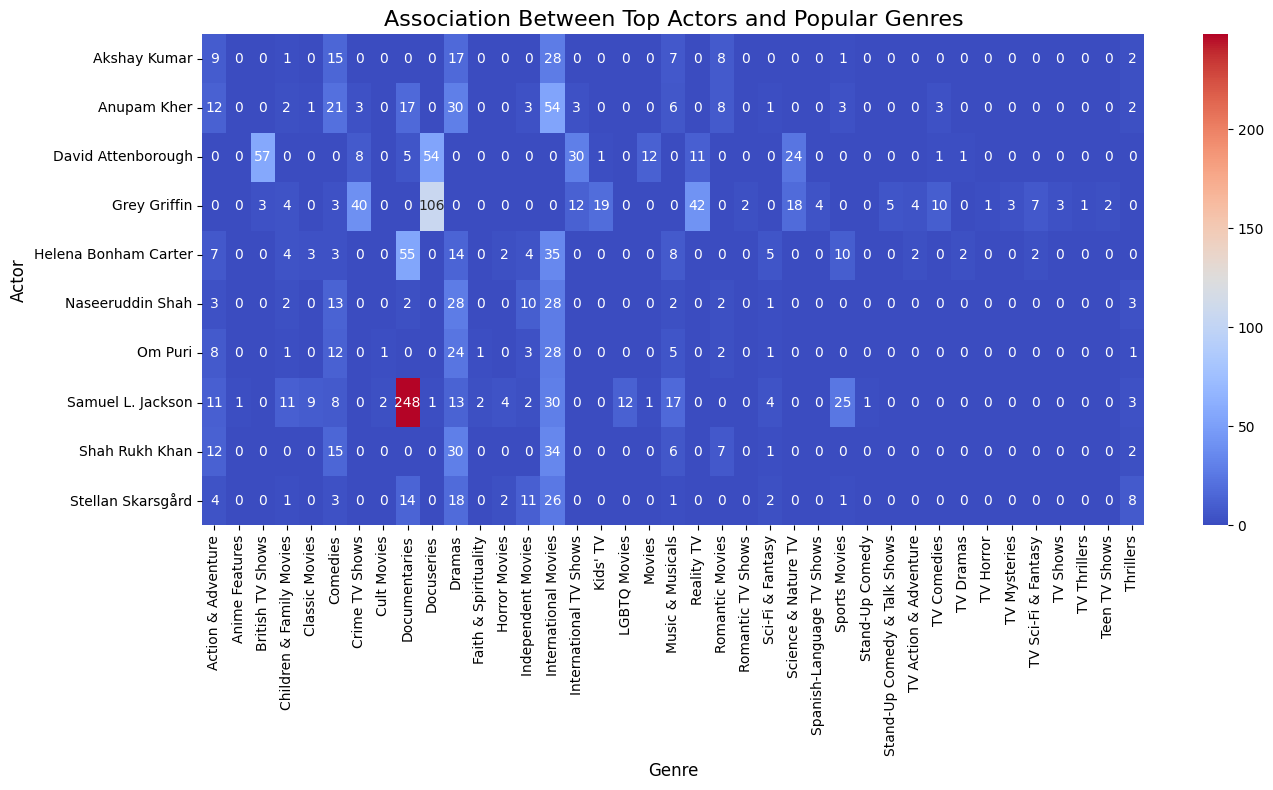

In [175]:
# Analyze top actors in association with genres
top_actor_genres = df_clean[df_clean['cast'].isin(top_actors.index)]
actor_genre_counts = top_actor_genres.groupby(['cast', 'listed_in']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(actor_genre_counts, cmap='coolwarm', annot=True, fmt='d', cbar=True)
plt.title('Association Between Top Actors and Popular Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()
plt.show()